In [1]:
import pandas as pd
import numpy as np
import pickle, time, math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x=pd.read_csv('x.csv')
y=pd.read_csv('y.csv')

C:\Users\h_agu\Desktop\machine_learning\Miniconda3\envs\tensorflow-gpu3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors=['b', 'r', 'g', 'y', 'c','m','k']

In [4]:
x['date']=pd.to_datetime(x['date'],format="%Y%m%d")
data=x.join(y)
if 'geoNetwork_cityId' in data.columns.tolist():
    data=data.drop(['geoNetwork_cityId'],axis=1)

In [5]:
for col in ['totals_bounces_imputed', 'totals_newVisits_imputed','totals_pageviews_imputed']:
    data[col]=data[col].astype(np.bool)

In [6]:
data.dtypes.T

channelGrouping                                         object
date                                            datetime64[ns]
fullVisitorId                                           object
sessionId                                               object
visitId                                                  int64
visitNumber                                              int64
visitStartTime                                           int64
device_browser                                          object
device_deviceCategory                                   object
device_isMobile                                           bool
device_operatingSystem                                  object
geoNetwork_city                                         object
geoNetwork_continent                                    object
geoNetwork_country                                      object
geoNetwork_metro                                        object
geoNetwork_networkDomain                               

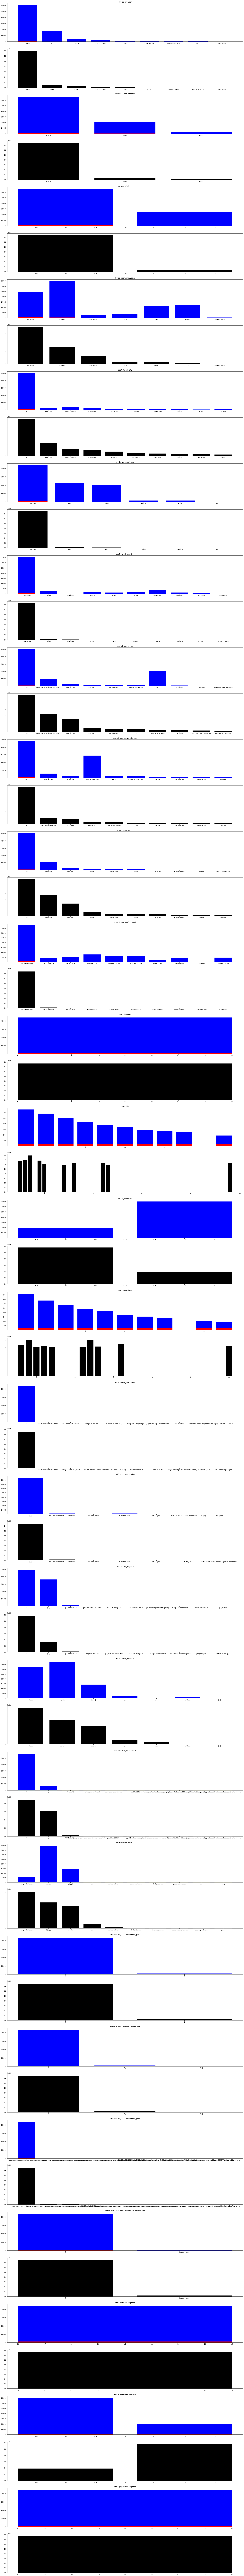

In [9]:
h=6
no_of_plot=len(cols)*2
fig = plt.figure()
no=1
for i,col in enumerate(cols):
    #print(i,col)
    _x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev','totals_transactionRevenue':'total_zero_revenue'})
    _x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
    _x2=_x.merge(_x2,on=col).drop(['total_zero_revenue'],axis=1)
    _x=_x2.sort_values(['total_transaction'],ascending=False).head(10)
    ax = fig.add_subplot(no_of_plot,1,no)
    no=no+1
    ax.bar(_x[col],_x['total_zero_rev'],color='b')
    ax.bar(_x[col],_x['total_transaction'],color='r')
    ax.set_title(col)
    
    _x=_x2.sort_values(['total_revenue'],ascending=False)
    ax2=fig.add_subplot(no_of_plot,1,no)
    no=no+1
    ax2.bar(_x[col].head(10),_x['total_revenue'].head(10),color='k')
   
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

C:\Users\h_agu\Desktop\machine_learning\Miniconda3\envs\tensorflow-gpu3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


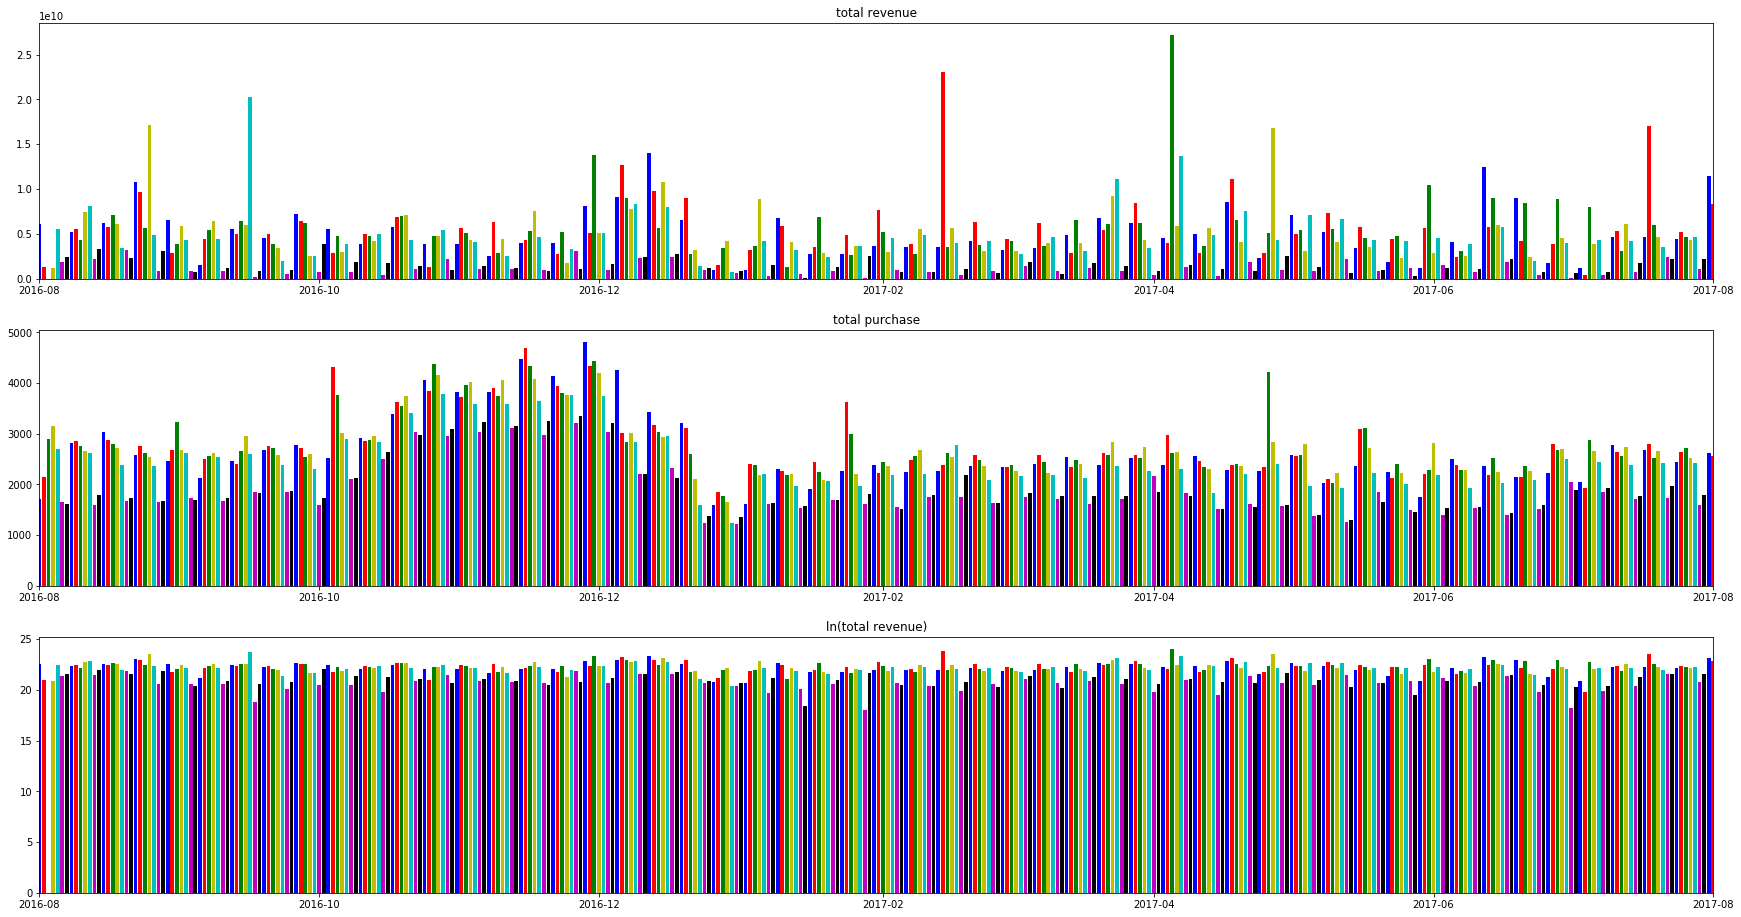

In [7]:
_x=data.groupby(['date']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x['daysofweek']=pd.to_datetime(_x.date,format='%Y-%m-%d').dt.dayofweek

fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.bar(_x['date'].tolist(),_x['total_revenue'].tolist(),color=[colors[d] for d in _x['daysofweek']])
ax.xaxis_date()
ax.set_xlim([_x['date'].tolist()[0],_x['date'].tolist()[-1]])
ax.set_title('total revenue')

ax2.bar(_x['date'].tolist(),_x['total_transaction'].tolist(),color=[colors[d] for d in _x['daysofweek']])
ax2.xaxis_date()
ax2.set_xlim([_x['date'].tolist()[0],_x['date'].tolist()[-1]])
ax2.set_title('total purchase')

ax3.bar(_x['date'].tolist(),np.log(_x['total_revenue'].tolist()),color=[colors[d] for d in _x['daysofweek']])
ax3.xaxis_date()
ax3.set_xlim([_x['date'].tolist()[0],_x['date'].tolist()[-1]])
ax3.set_title('ln(total revenue)')

plt.show()

In [29]:
data=pd.read_csv('train_data.csv')

C:\Users\h_agu\Desktop\machine_learning\Miniconda3\envs\tensorflow-gpu3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
data.columns

Index(['channelGrouping', 'date', 'device_browser', 'device_deviceCategory',
       'device_isMobile', 'device_operatingSystem', 'fullVisitorId',
       'geoNetwork_city', 'geoNetwork_city_is_revenue_above_mean',
       'geoNetwork_city_trans_view_above_1_per_mile', 'geoNetwork_continent',
       'geoNetwork_country', 'geoNetwork_metro',
       'geoNetwork_metro_is_revenue_above_mean',
       'geoNetwork_metro_trans_view_above_1_per_mile',
       'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'sessionId', 'totals_bounces',
       'totals_bounces_imputed', 'totals_hits', 'totals_hits_between_10_30',
       'totals_hits_between_30_50', 'totals_hits_between_50_100',
       'totals_hits_between_5_10', 'totals_hits_greater_100',
       'totals_hits_to_5', 'totals_newVisits', 'totals_newVisits_imputed',
       'totals_pageviews', 'totals_pageviews_between_10_30',
       'totals_pageviews_between_30_50', 'totals_pageviews_between_50_100',
       'totals_pag

## visitStartTime_dayofweek added column

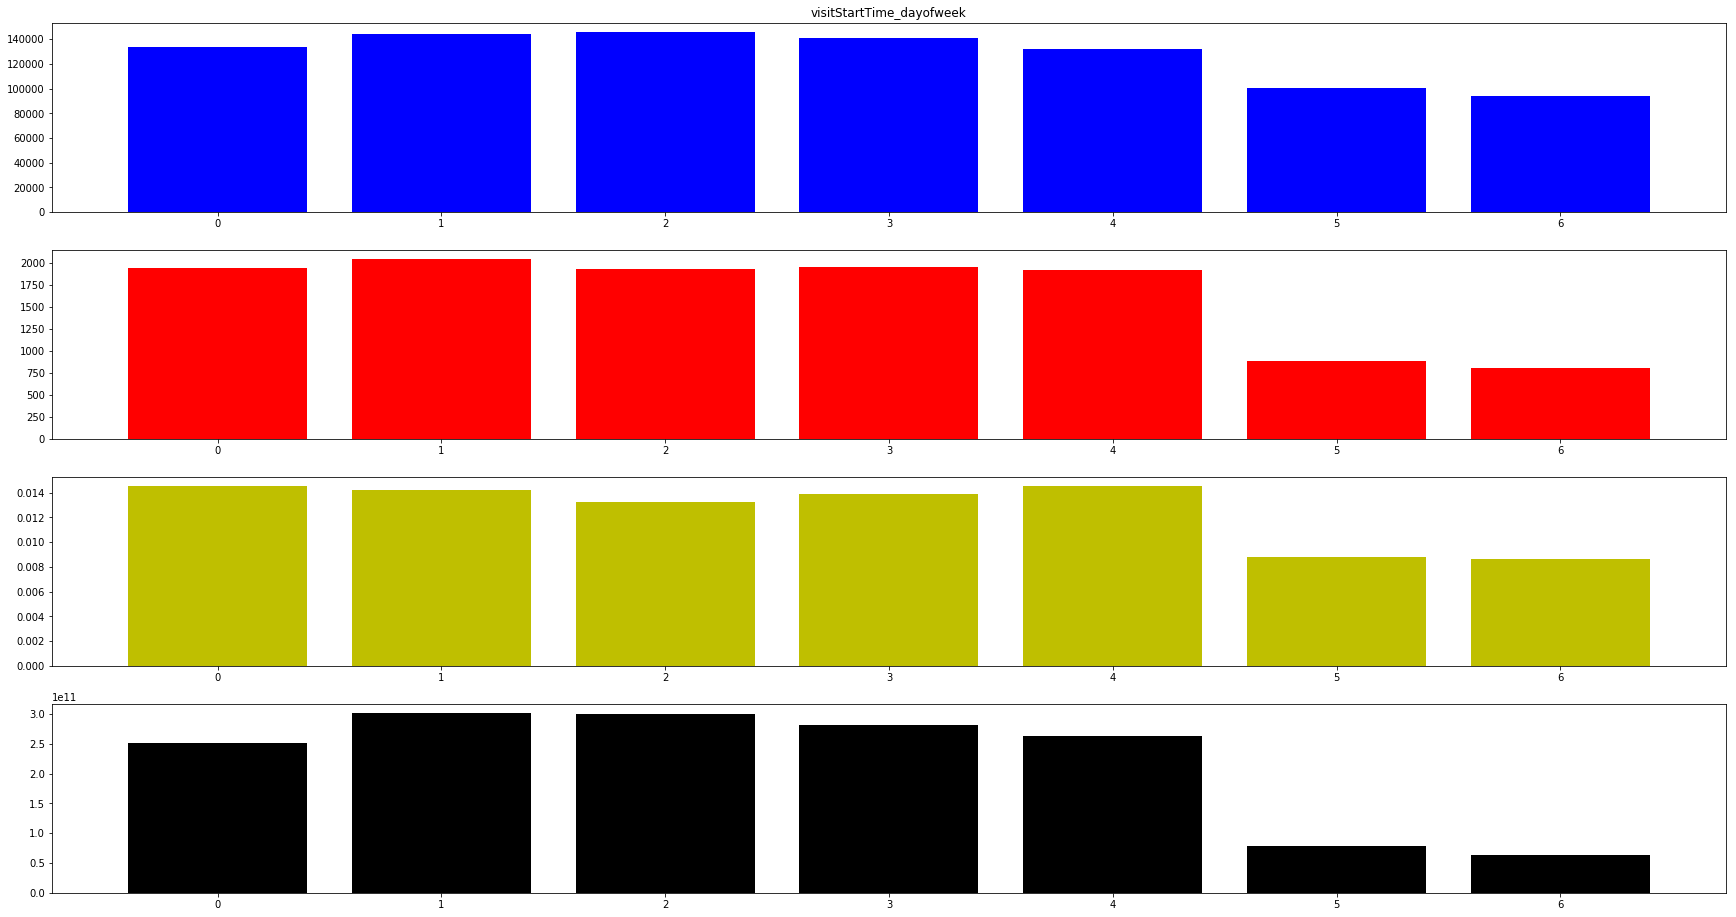

In [28]:
col='visitStartTime_dayofweek'
fig = plt.figure()
no=1
no_of_plot=4
n=100

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [ ]:
## visitStartTime_dayofyear

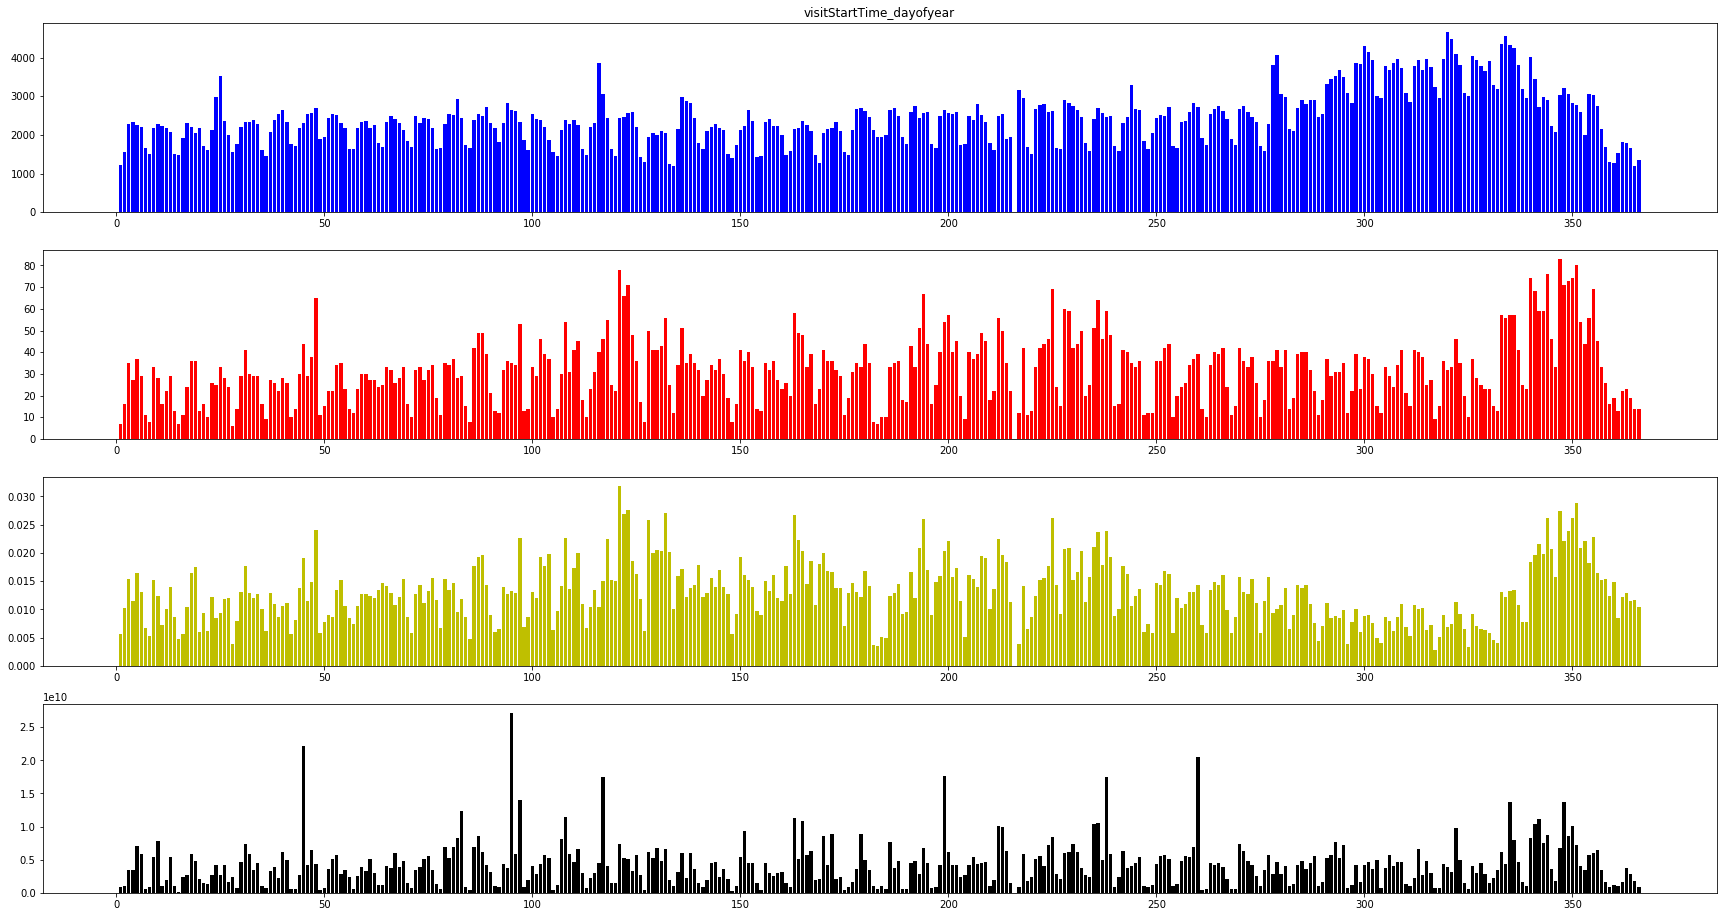

In [49]:
col='visitStartTime_dayofyear'
fig = plt.figure()
no=1
no_of_plot=4
n=500

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
#_x=_x2.sort_values(['visitStartTime_dayofyear'],ascending=False)
_x=_x2
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [48]:
np.min(_x['total_transaction'])

6

In [45]:
np.min(_x.sort_values(['visitStartTime_dayofyear'],ascending=True)['total_transaction'])

6

In [47]:
_x.sort_values(['visitStartTime_dayofyear'],ascending=True).iloc[25:28]

,visitStartTime_dayofyear,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio
25,26,2360,0.0,28,4.133280e+09,0.011864
26,27,2007,0.0,24,1.621210e+09,0.011958
27,28,1559,0.0,6,2.446670e+09,0.003849


In [8]:
cols=['device_browser'                                       
,'device_deviceCategory'                                   
,'device_isMobile'                                         
,'device_operatingSystem'                                  
,'geoNetwork_city'                                         
,'geoNetwork_continent'                                    
,'geoNetwork_country'                                      
,'geoNetwork_metro'                                        
,'geoNetwork_networkDomain'                                
,'geoNetwork_region'                                       
,'geoNetwork_subContinent'                                 
,'totals_bounces'                                          
,'totals_hits'                                             
,'totals_newVisits'                                        
,'totals_pageviews'                                        
,'trafficSource_adContent'                                 
,'trafficSource_campaign'                                  
,'trafficSource_keyword'                                   
,'trafficSource_medium'                                    
,'trafficSource_referralPath'                              
,'trafficSource_source'                                    
,'trafficSource_adwordsClickInfo_page'                     
,'trafficSource_adwordsClickInfo_slot'                     
,'trafficSource_adwordsClickInfo_gclId'                    
,'trafficSource_adwordsClickInfo_adNetworkType'            
,'totals_bounces_imputed'
,'totals_newVisits_imputed'
,'totals_pageviews_imputed']

## total page view

Total page show the more user visit the page the more likely to make transaction

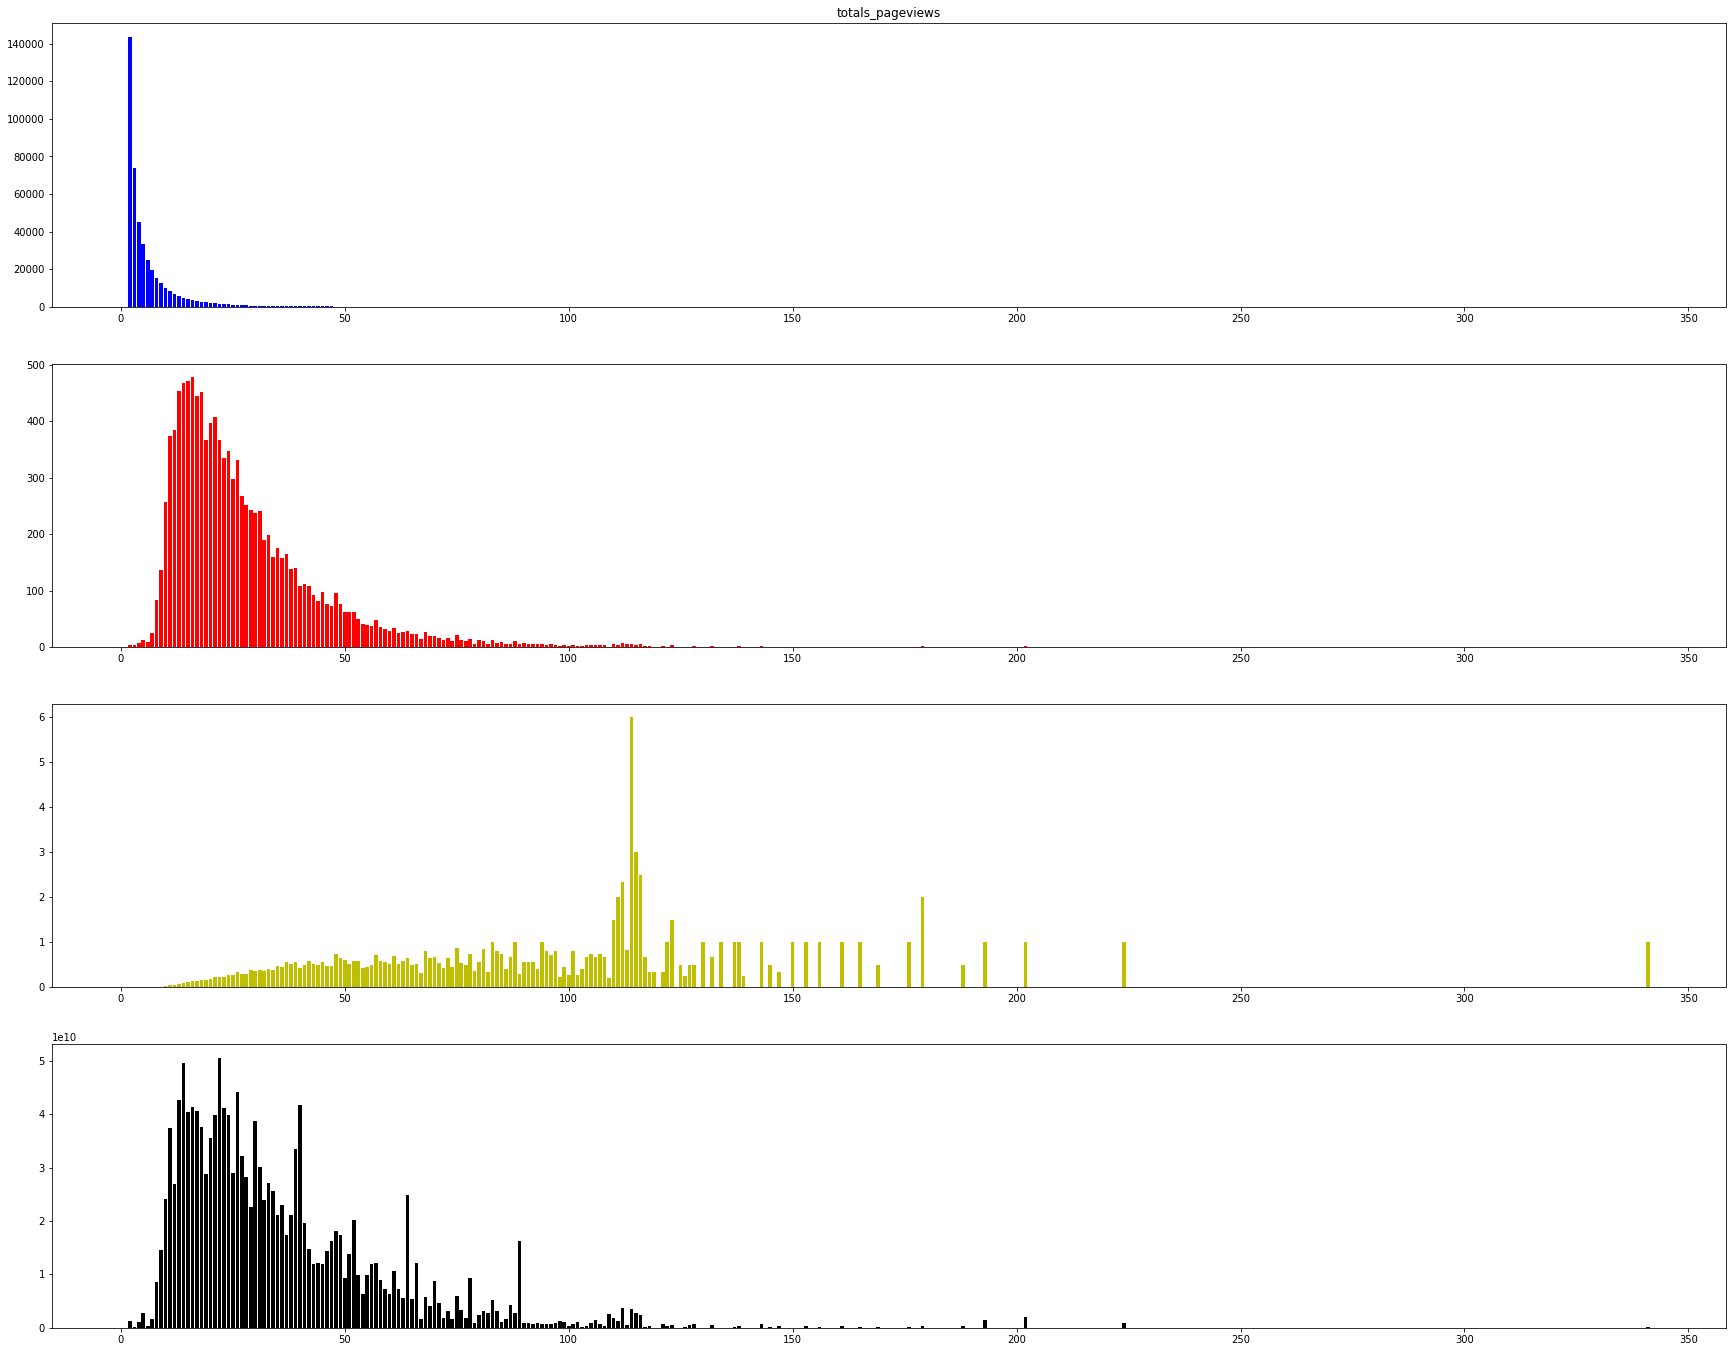

In [10]:
col='totals_pageviews'
fig = plt.figure()
no=1
no_of_plot=4
n=150

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [11]:
bins=[5,10,30,50,100]
column_name='totals_pageviews'
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150']
#_=[for _bin in bins]
#print(len(bins),len(bin_labels))
bin_labels=[]
for i,_bin in enumerate(bins):
    if i == 0 :
        bin_labels.append(column_name+'_to_'+str(_bin))
        data[bin_labels[i]]=data[column_name]<=_bin
        data[bin_labels[i]].astype(np.bool)
    else :
        bin_labels.append(column_name+'_between_'+str(bins[i-1])+'_'+str(_bin))
        data[bin_labels[i]]=(data[column_name]<=_bin) & (data[column_name]>bins[i-1])
        data[bin_labels[i]].astype(np.bool)
    if len(bins)-1 == i:
        bin_labels.append(column_name+'_greater_'+str(_bin))
        data[bin_labels[i+1]]=(data[column_name]>_bin)
        data[bin_labels[i+1]].astype(np.bool)

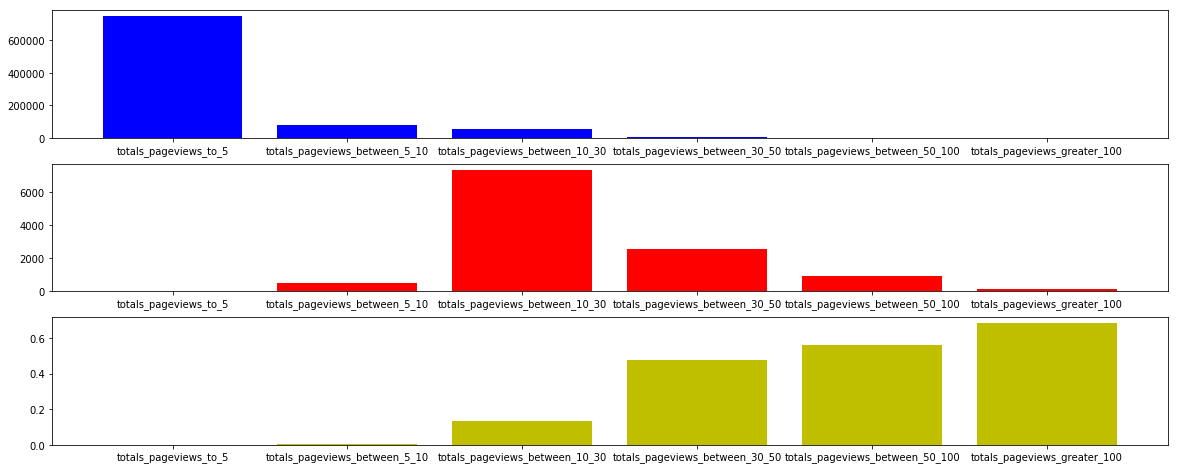

In [13]:
fig = plt.figure()
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150','visit_greater150']
count_1=[]
count_2=[]
_=[count_1.append((data[data['totals_transactionRevenue']==0.0])[lb].sum()) for lb in bin_labels]
_=[count_2.append((data[data['totals_transactionRevenue']>0.0])[lb].sum()) for lb in bin_labels]
ax=fig.add_subplot(3,1,1)
ax.bar(bin_labels,count_1,color='b')

ax2=fig.add_subplot(3,1,2)
ax2.bar(bin_labels,count_2,color='r')

ax3=fig.add_subplot(3,1,3)
ax3.bar(bin_labels,np.array(count_2)/np.array(count_1),color='y')

fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

## total_hit

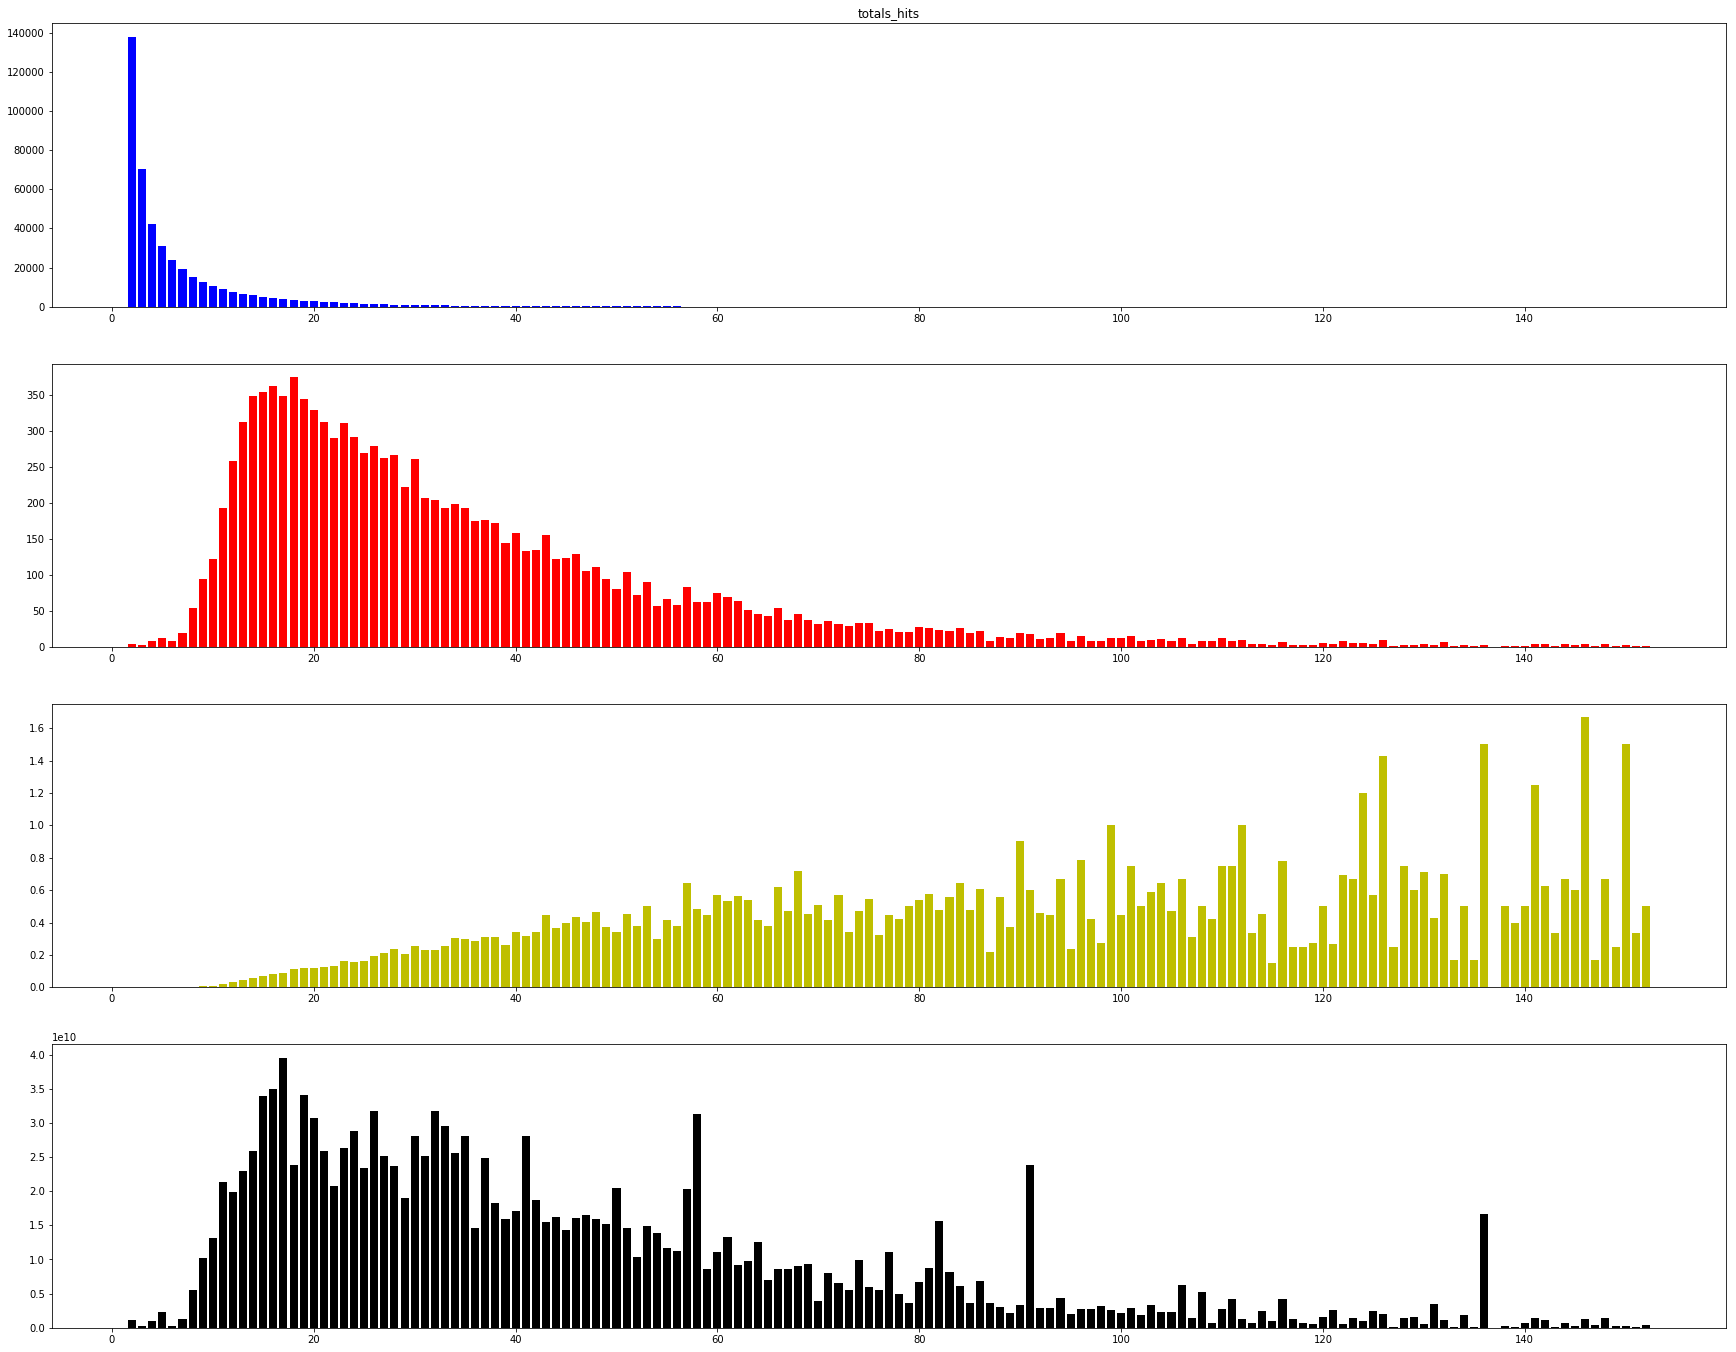

In [14]:
col='totals_hits'
fig = plt.figure()
no=1
no_of_plot=4
n=150

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [15]:
bins=[5,10,30,50,100]
column_name='totals_hits'
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150']
#_=[for _bin in bins]
#print(len(bins),len(bin_labels))
bin_labels=[]
for i,_bin in enumerate(bins):
    if i == 0 :
        bin_labels.append(column_name+'_to_'+str(_bin))
        data[bin_labels[i]]=data[column_name]<=_bin
        data[bin_labels[i]].astype(np.bool)
    else :
        bin_labels.append(column_name+'_between_'+str(bins[i-1])+'_'+str(_bin))
        data[bin_labels[i]]=(data[column_name]<=_bin) & (data[column_name]>bins[i-1])
        data[bin_labels[i]].astype(np.bool)
    if len(bins)-1 == i:
        bin_labels.append(column_name+'_greater_'+str(_bin))
        data[bin_labels[i+1]]=(data[column_name]>_bin)
        data[bin_labels[i+1]].astype(np.bool)

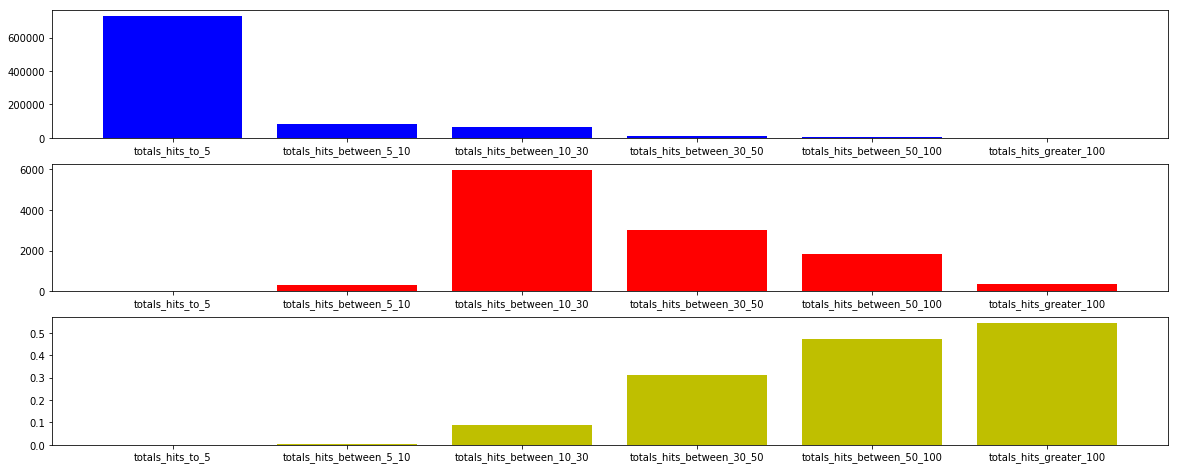

In [16]:
fig = plt.figure()
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150','visit_greater150']
count_1=[]
count_2=[]
_=[count_1.append((data[data['totals_transactionRevenue']==0.0])[lb].sum()) for lb in bin_labels]
_=[count_2.append((data[data['totals_transactionRevenue']>0.0])[lb].sum()) for lb in bin_labels]
ax=fig.add_subplot(3,1,1)
ax.bar(bin_labels,count_1,color='b')

ax2=fig.add_subplot(3,1,2)
ax2.bar(bin_labels,count_2,color='r')

ax3=fig.add_subplot(3,1,3)
ax3.bar(bin_labels,np.array(count_2)/np.array(count_1),color='y')

fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [14]:
data=pd.read_csv('train_data.csv')

C:\Users\h_agu\Desktop\machine_learning\Miniconda3\envs\tensorflow-gpu3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## visitNumber

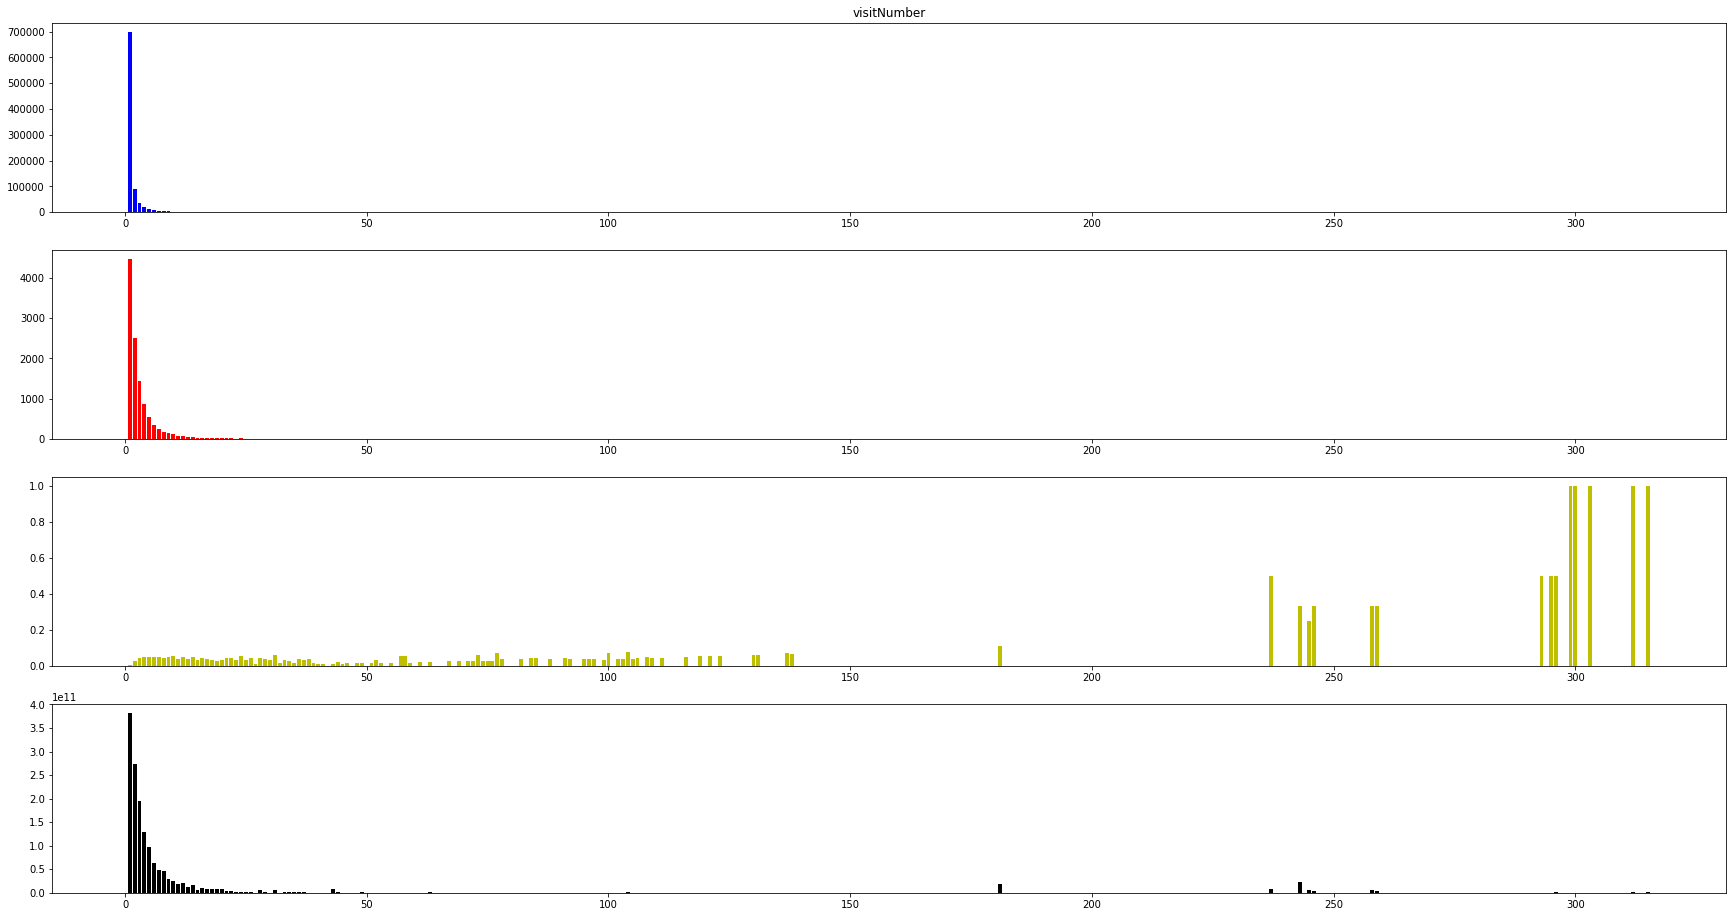

In [15]:
col='visitNumber'
fig = plt.figure()
no=1
no_of_plot=4
n=150

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [16]:
bins=[5,10,30,50,100]
#column_name='totals_hits'
column_name=col
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150']
#_=[for _bin in bins]
#print(len(bins),len(bin_labels))
bin_labels=[]
for i,_bin in enumerate(bins):
    if i == 0 :
        bin_labels.append(column_name+'_to_'+str(_bin))
        data[bin_labels[i]]=data[column_name]<=_bin
        data[bin_labels[i]].astype(np.bool)
    else :
        bin_labels.append(column_name+'_between_'+str(bins[i-1])+'_'+str(_bin))
        data[bin_labels[i]]=(data[column_name]<=_bin) & (data[column_name]>bins[i-1])
        data[bin_labels[i]].astype(np.bool)
    if len(bins)-1 == i:
        bin_labels.append(column_name+'_greater_'+str(_bin))
        data[bin_labels[i+1]]=(data[column_name]>_bin)
        data[bin_labels[i+1]].astype(np.bool)

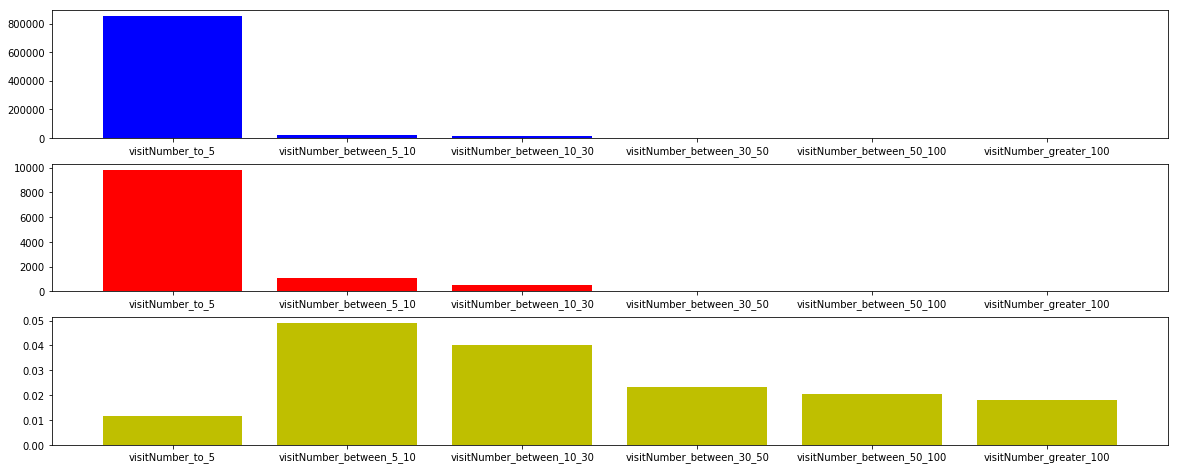

In [17]:
fig = plt.figure()
#bin_labels=['visit_1to5','visit_5to10','visit_10to30','visit_30to50','visit_50to100','visit_100to150','visit_greater150']
count_1=[]
count_2=[]
_=[count_1.append((data[data['totals_transactionRevenue']==0.0])[lb].sum()) for lb in bin_labels]
_=[count_2.append((data[data['totals_transactionRevenue']>0.0])[lb].sum()) for lb in bin_labels]
ax=fig.add_subplot(3,1,1)
ax.bar(bin_labels,count_1,color='b')

ax2=fig.add_subplot(3,1,2)
ax2.bar(bin_labels,count_2,color='r')

ax3=fig.add_subplot(3,1,3)
ax3.bar(bin_labels,np.array(count_2)/np.array(count_1),color='y')

fig.set_figwidth(20)
fig.set_figheight(8)
plt.show()

In [19]:
data=data.drop(['Unnamed: 0'],axis=1)

In [22]:
data.to_csv('train_data.csv',index=False)

## geoNetwork_city

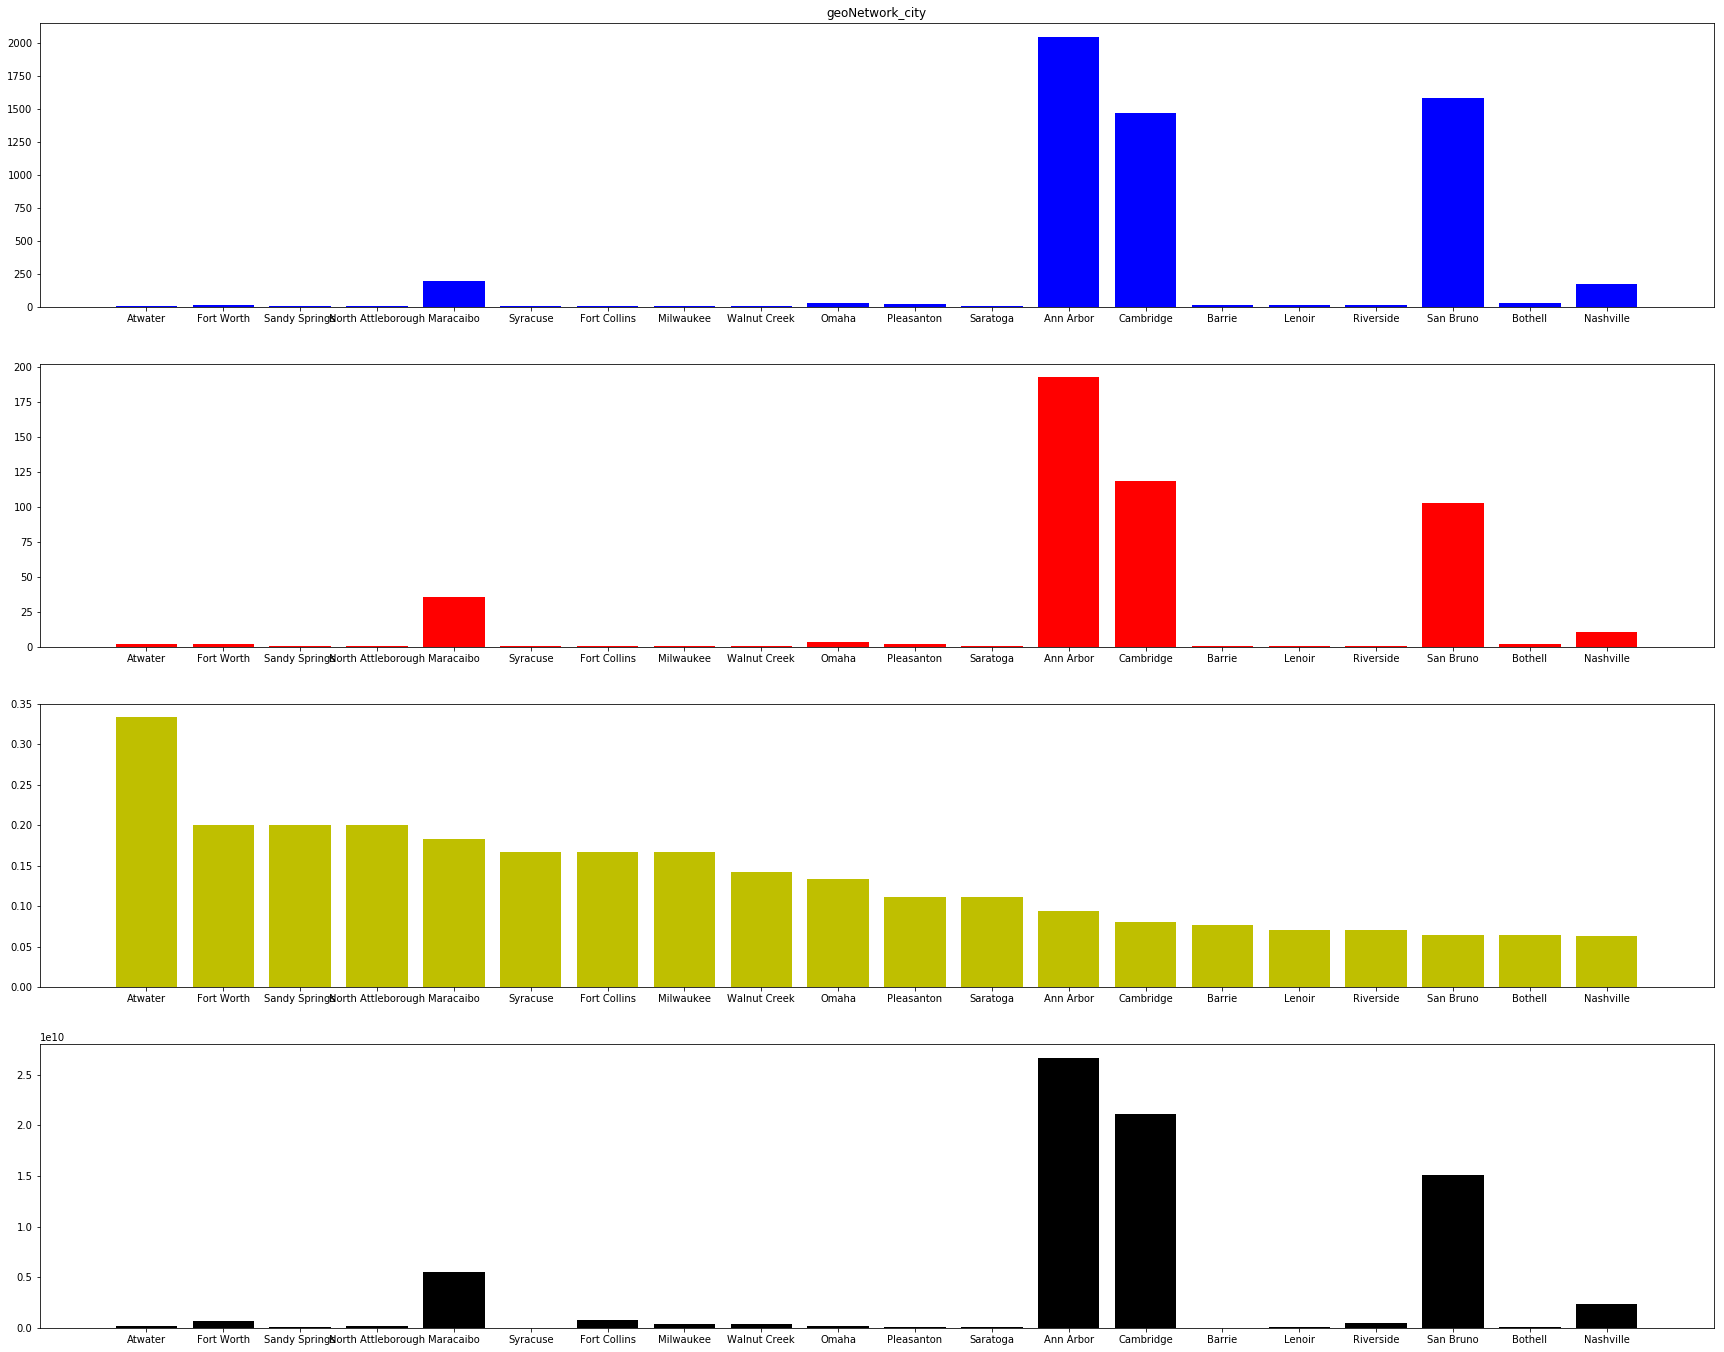

In [22]:
col='geoNetwork_city'
fig = plt.figure()
no=1
no_of_plot=4
n=20

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [26]:
_x['trans_ratio_by_revenue']=_x['rev_to_zero_ratio']*((_x['total_revenue']-np.mean(_x['total_revenue']))/np.std(_x['total_revenue']))

In [40]:
_x.sort_values(['trans_ratio_by_revenue'],ascending=False).head(20)

,geoNetwork_city,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio,trans_ratio_by_revenue
76,New York,24865,0.0,1506,2.201435e+11,0.060567,0.209532
133,nad,503650,0.0,4579,6.461611e+11,0.009092,0.095671
24,Chicago,7022,0.0,422,7.285453e+10,0.060097,0.061142
72,Mountain View,39675,0.0,1209,1.261037e+11,0.030473,0.057907
103,San Francisco,19600,0.0,729,1.008740e+11,0.037194,0.055120
3,Ann Arbor,2048,0.0,193,2.667747e+10,0.094238,0.023726
61,Los Angeles,8381,0.0,289,4.189633e+10,0.034483,0.017383
117,Sunnyvale,12631,0.0,455,3.939358e+10,0.036022,0.016664
22,Cambridge,1466,0.0,119,2.116078e+10,0.081173,0.013012
112,Seattle,4797,0.0,228,2.699117e+10,0.047530,0.012213


In [41]:
_x.sort_values(['rev_to_zero_ratio'],ascending=False).head(20)

,geoNetwork_city,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio,trans_ratio_by_revenue
6,Atwater,6,0.0,2,1.887100e+08,0.333333,-0.062477
107,Sandy Springs,5,0.0,1,8.895000e+07,0.200000,-0.037817
77,North Attleborough,5,0.0,1,1.802100e+08,0.200000,-0.037514
38,Fort Worth,10,0.0,2,6.261500e+08,0.200000,-0.036035
62,Maracaibo,196,0.0,36,5.507890e+09,0.183673,-0.018227
37,Fort Collins,6,0.0,1,7.945600e+08,0.166667,-0.029564
119,Syracuse,6,0.0,1,1.695000e+07,0.166667,-0.031713
68,Milwaukee,6,0.0,1,3.988900e+08,0.166667,-0.030658
128,Walnut Creek,7,0.0,1,3.567900e+08,0.142857,-0.026378
79,Omaha,30,0.0,4,1.534500e+08,0.133333,-0.025069


In [45]:
#city with revenue better than average rev-mean(rev)>0
topcity_by_ave=_x[_x['trans_ratio_by_revenue']>0]['geoNetwork_city'].tolist()

#city with trans per visit > 1e-3
topcity_by_trans_per_visit=_x[_x['rev_to_zero_ratio']>1e-3]['geoNetwork_city'].tolist()

city=[]
_=[city.append(c) for c in topcity_by_ave if c not in ['nad','(ns)'] ]
topcity_by_ave=city
city=[]
_=[city.append(c) for c in topcity_by_trans_per_visit if c not in ['nad','(ns)'] ]
topcity_by_trans_per_visit=city

print('topcity_by_ave',topcity_by_ave,'\ntopcity_by_trans_per_visit',topcity_by_trans_per_visit)

topcity_by_ave ['New York', 'Chicago', 'Mountain View', 'San Francisco', 'Ann Arbor', 'Los Angeles', 'Sunnyvale', 'Cambridge', 'Seattle', 'Austin', 'Salem', 'Atlanta', 'San Bruno', 'San Jose', 'Toronto'] 
topcity_by_trans_per_visit ['New York', 'Chicago', 'Mountain View', 'San Francisco', 'Ann Arbor', 'Los Angeles', 'Sunnyvale', 'Cambridge', 'Seattle', 'Austin', 'Salem', 'Atlanta', 'San Bruno', 'San Jose', 'Toronto', 'Minato', 'Ahmedabad', 'Sydney', 'Singapore', 'Hamburg', 'Dublin', 'Kuala Lumpur', 'Melbourne', 'Barcelona', 'Tunis', 'Athens', 'Hong Kong', 'Vienna', 'Sao Paulo', 'Prague', 'Jakarta', 'Seoul', 'Zurich', 'Mexico City', 'Kitchener', 'Yokohama', 'Washington', 'Rio de Janeiro', 'Tbilisi', 'Santiago', 'Montreal', 'Vancouver', 'Santa Clara', 'Redmond', 'Columbus', 'Detroit', 'Evanston', 'Calgary', 'Dallas', 'Palo Alto', 'Houston', 'Irvine', 'Philadelphia', 'Las Vegas', 'Menlo Park', 'Boston', 'Cincinnati', 'Sacramento', 'Orlando', 'Fresno', 'Fremont', 'Raleigh', 'Indianapolis',

In [47]:
data['geoNetwork_city_is_revenue_above_mean']=data['geoNetwork_city'].isin(topcity_by_ave)
data['geoNetwork_city_trans_view_above_1_per_mile']=data['geoNetwork_city'].isin(topcity_by_trans_per_visit)

## geoNetwork_continent

is not statistically significant

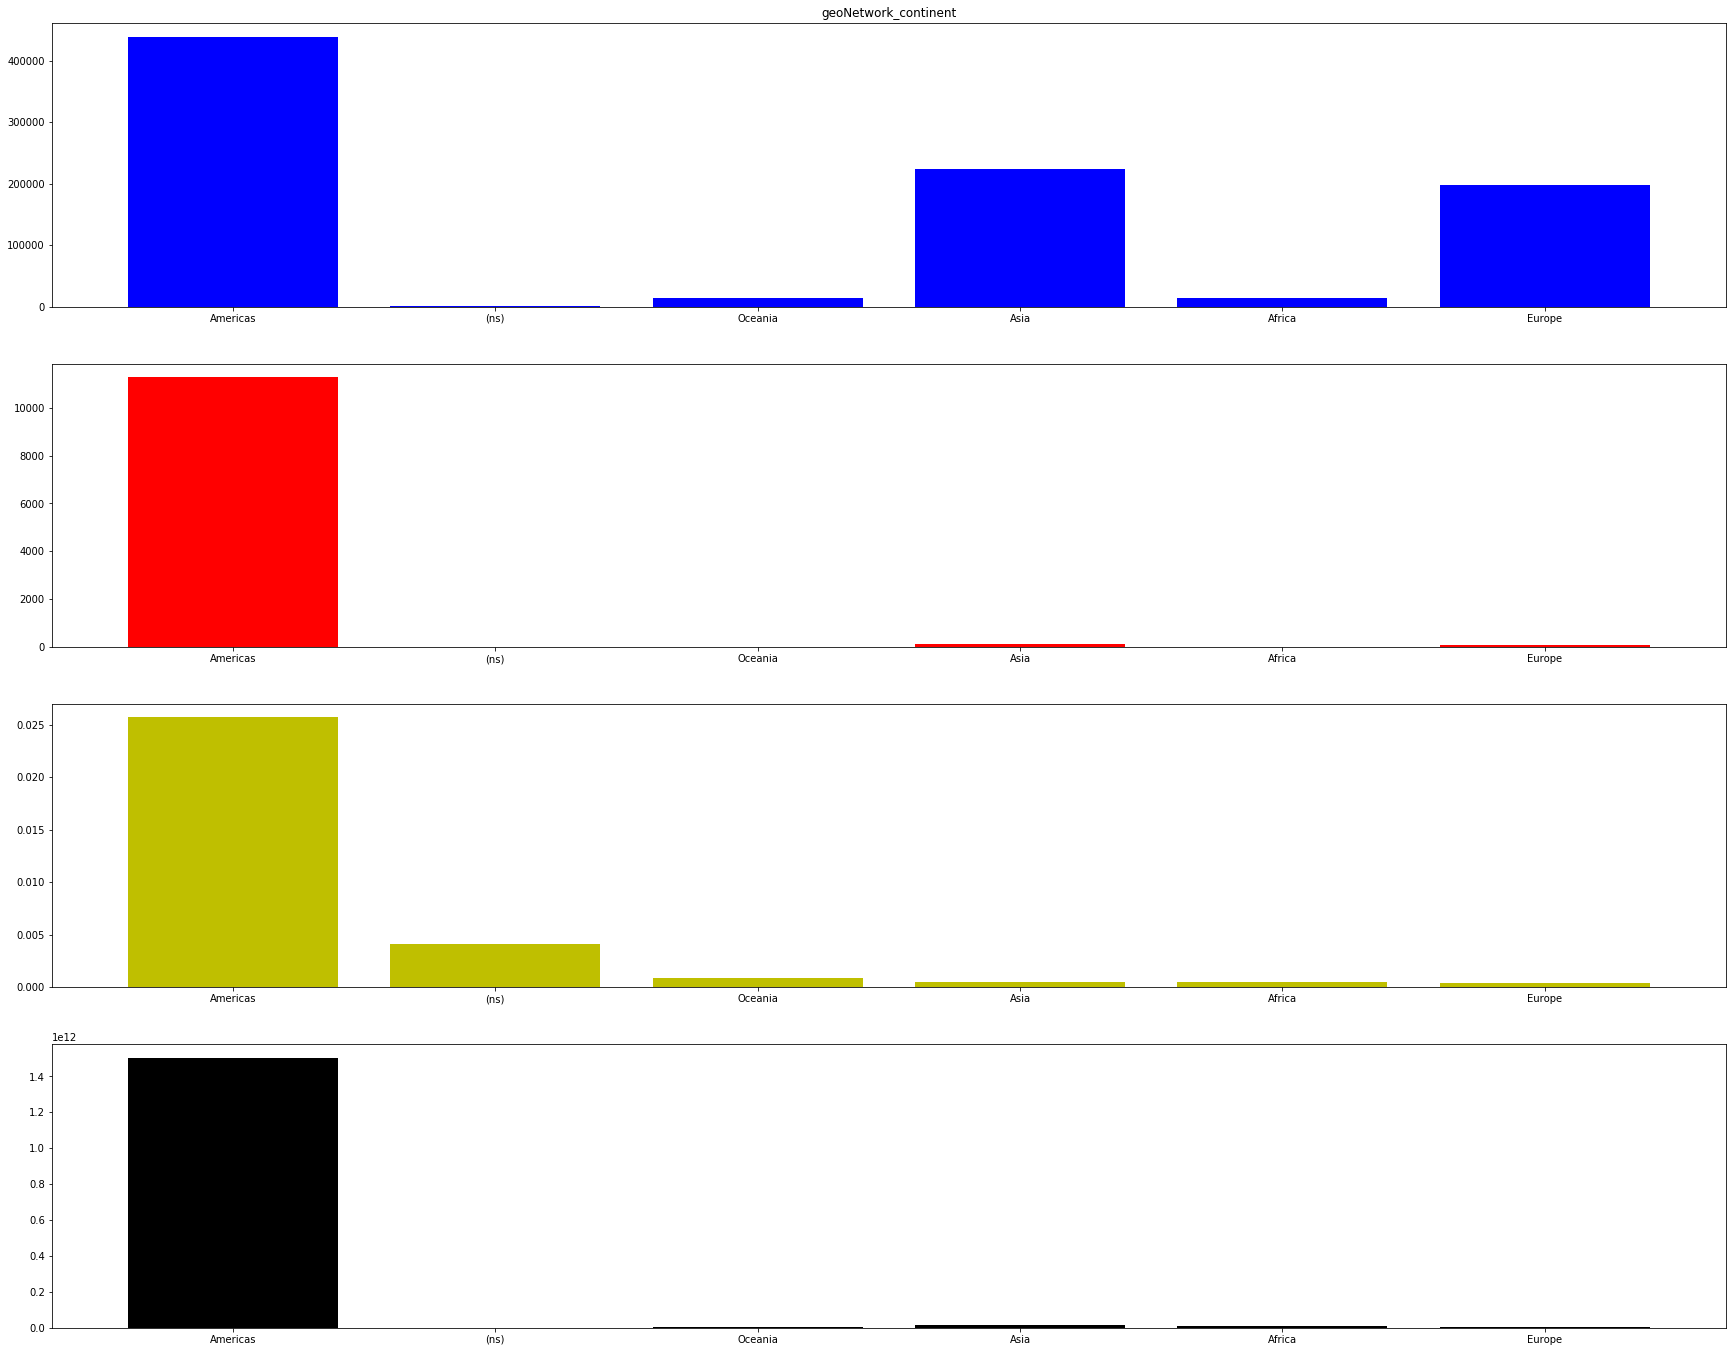

In [49]:
col='geoNetwork_continent'
fig = plt.figure()
no=1
no_of_plot=4
n=20

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

## geoNetwork_country
is not siqnifican

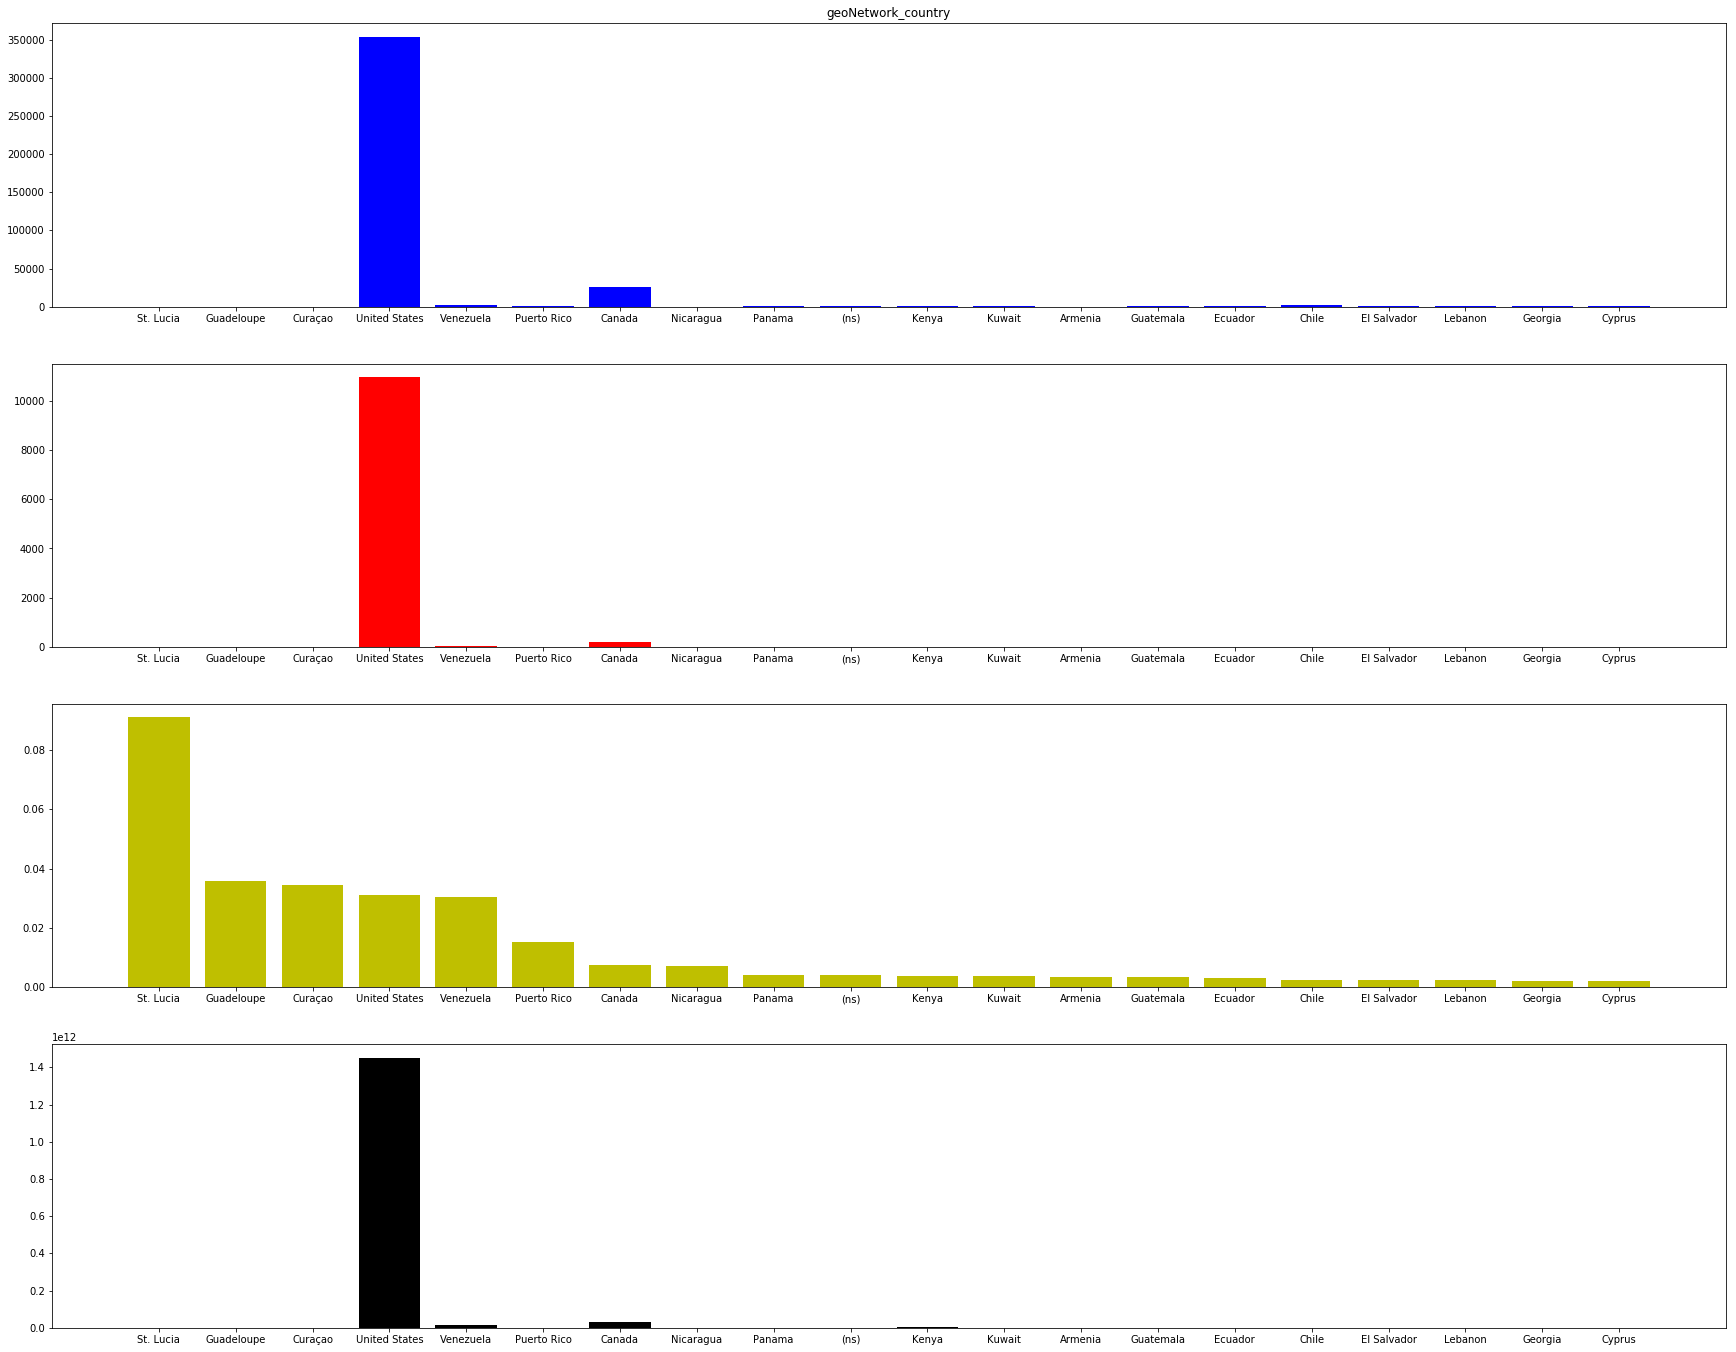

In [50]:
col='geoNetwork_country'
fig = plt.figure()
no=1
no_of_plot=4
n=20

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [53]:
_x[(_x['total_revenue']-np.mean(_x['total_revenue']))>0].head()

,geoNetwork_country,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio
65,United States,353791,0.0,10953,1.452441e+12,0.030959
6,Canada,25679,0.0,190,3.282454e+10,0.007399


## geoNetwork_metro

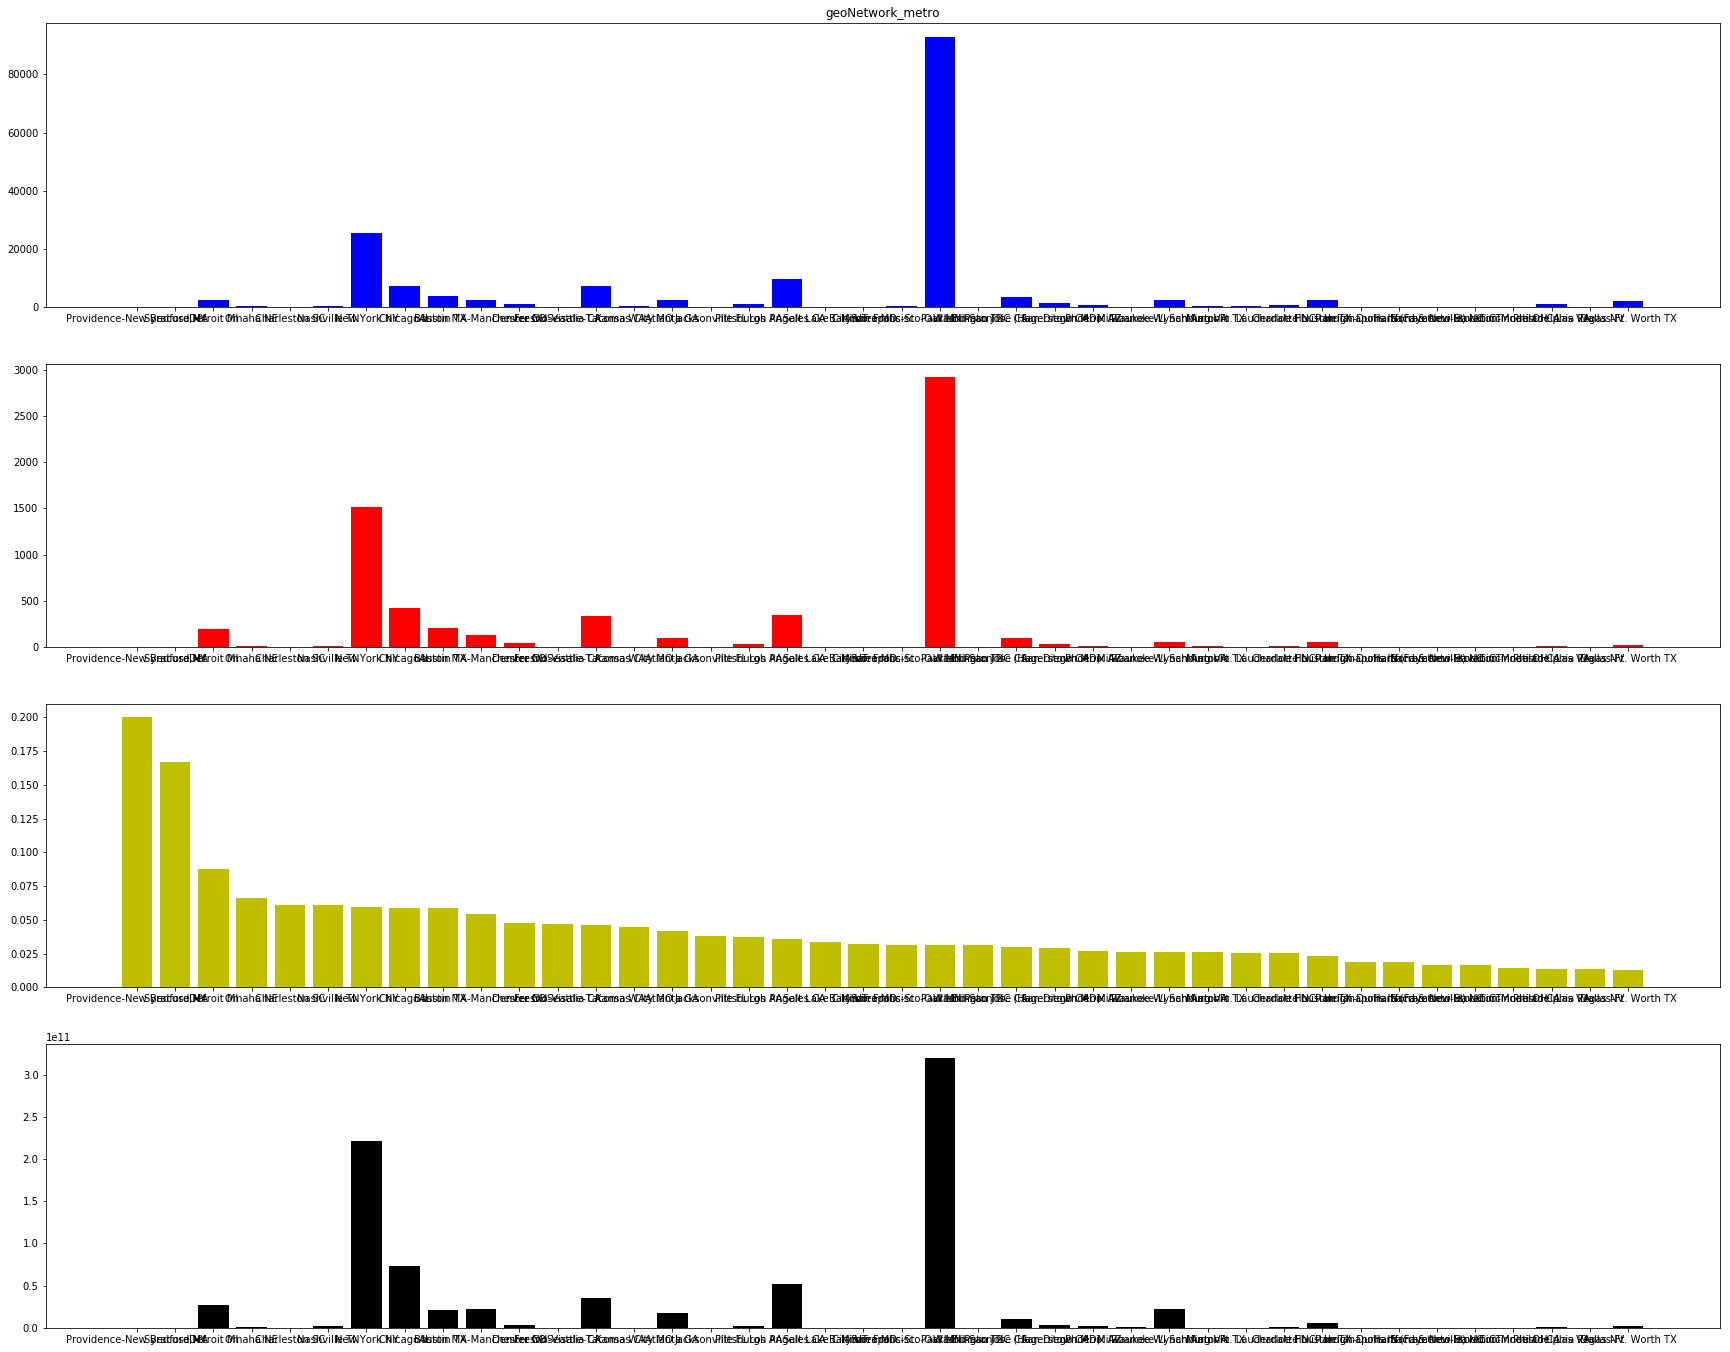

In [62]:
col='geoNetwork_metro'
fig = plt.figure()
no=1
no_of_plot=4
n=40

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [63]:
_x['trans_ratio_by_revenue']=_x['rev_to_zero_ratio']*((_x['total_revenue']-np.mean(_x['total_revenue']))/np.std(_x['total_revenue']))

In [64]:
_x.sort_values(['trans_ratio_by_revenue'],ascending=False).head(20)

,geoNetwork_metro,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio,trans_ratio_by_revenue
27,New York NY,25399,0.0,1518,2.213181e+11,0.059766,0.104488
41,San Francisco-Oakland-San Jose CA,92994,0.0,2919,3.200364e+11,0.031389,0.083718
45,nad,503650,0.0,4579,6.461611e+11,0.009092,0.051845
7,Chicago IL,7162,0.0,423,7.291288e+10,0.059062,0.021677
22,Los Angeles CA,9652,0.0,343,5.133227e+10,0.035537,0.005905
42,Seattle-Tacoma WA,7306,0.0,336,3.517995e+10,0.045990,0.000728
0,(ns),201497,0.0,269,4.238670e+10,0.001335,0.000111
21,London,12560,0.0,11,1.460000e+09,0.000876,-0.000261
9,Columbus OH,513,0.0,4,1.334200e+08,0.007797,-0.002420
36,Roanoke-Lynchburg VA,2170,0.0,57,2.211592e+10,0.026267,-0.002778


In [65]:
_x.sort_values(['rev_to_zero_ratio'],ascending=False).head(20)

,geoNetwork_metro,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio,trans_ratio_by_revenue
34,"Providence-New Bedford,MA",5,0.0,1,1.802100e+08,0.200000,-0.061987
43,Syracuse NY,6,0.0,1,1.695000e+07,0.166667,-0.051909
12,Detroit MI,2209,0.0,194,2.669845e+10,0.087823,-0.005543
28,Omaha NE,121,0.0,8,3.608400e+08,0.066116,-0.020380
5,Charleston SC,49,0.0,3,2.554300e+08,0.061224,-0.018933
26,Nashville TN,180,0.0,11,2.374230e+09,0.061111,-0.017692
27,New York NY,25399,0.0,1518,2.213181e+11,0.059766,0.104488
7,Chicago IL,7162,0.0,423,7.291288e+10,0.059062,0.021677
2,Austin TX,3580,0.0,210,2.080498e+10,0.058659,-0.006920
4,Boston MA-Manchester NH,2492,0.0,136,2.270787e+10,0.054575,-0.005472


In [67]:
#city with revenue better than average rev-mean(rev)>0
top_by_ave=_x[_x['trans_ratio_by_revenue']>0][col].tolist()

#city with trans per visit > 1e-3
top_by_trans_per_visit=_x[_x['rev_to_zero_ratio']>1e-3][col].tolist()

top=[]
_=[top.append(c) for c in top_by_ave if c not in ['nad','(ns)'] ]
top_by_ave=top
top=[]
_=[top.append(c) for c in top_by_trans_per_visit if c not in ['nad','(ns)'] ]
top_by_trans_per_visit=top

print('top_by_ave',top_by_ave,'\ntop_by_trans_per_visit',top_by_trans_per_visit)

top_by_ave ['New York NY', 'Chicago IL', 'Seattle-Tacoma WA', 'Los Angeles CA', 'San Francisco-Oakland-San Jose CA'] 
top_by_trans_per_visit ['Providence-New Bedford,MA', 'Syracuse NY', 'Detroit MI', 'Omaha NE', 'Charleston SC', 'Nashville TN', 'New York NY', 'Chicago IL', 'Austin TX', 'Boston MA-Manchester NH', 'Denver CO', 'Fresno-Visalia CA', 'Seattle-Tacoma WA', 'Kansas City MO', 'Atlanta GA', 'Jacksonville FL', 'Pittsburgh PA', 'Los Angeles CA', 'Salt Lake City UT', 'Baltimore MD', 'Minneapolis-St. Paul MN', 'San Francisco-Oakland-San Jose CA', 'El Paso TX', 'Washington DC (Hagerstown MD)', 'San Diego CA', 'Phoenix AZ', 'Milwaukee WI', 'Roanoke-Lynchburg VA', 'San Antonio TX', 'Miami-Ft. Lauderdale FL', 'Charlotte NC', 'Houston TX', 'Indianapolis IN', 'Raleigh-Durham (Fayetteville) NC', 'Hartford & New Haven CT', 'Sacramento-Stockton-Modesto CA', 'Cincinnati OH', 'Philadelphia PA', 'Las Vegas NV', 'Dallas-Ft. Worth TX', 'Orlando-Daytona Beach-Melbourne FL', 'Portland OR', 'Columbu

In [68]:
data[col+'_is_revenue_above_mean']=data[col].isin(top_by_ave)
data[col+'_trans_view_above_1_per_mile']=data[col].isin(top_by_trans_per_visit)

In [69]:
data.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,...,totals_hits_to_5,totals_hits_between_5_10,totals_hits_between_10_30,totals_hits_between_30_50,totals_hits_between_50_100,totals_hits_greater_100,geoNetwork_city_is_revenue_above_mean,geoNetwork_city_trans_view_above_1_per_mile,geoNetwork_metro_is_revenue_above_mean,geoNetwork_metro_trans_view_above_1_per_mile
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,...,True,False,False,False,False,False,False,False,False,False
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,...,True,False,False,False,False,False,False,False,False,False
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,...,True,False,False,False,False,False,False,False,False,False
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,...,True,False,False,False,False,False,False,False,False,False
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,...,True,False,False,False,False,False,False,False,False,False


In [70]:
data.to_csv('train_data.csv',index=False)

In [2]:
data=pd.read_csv('train_data.csv')

C:\Users\h_agu\Desktop\machine_learning\Miniconda3\envs\tensorflow-gpu3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## geoNetwork_networkDomain

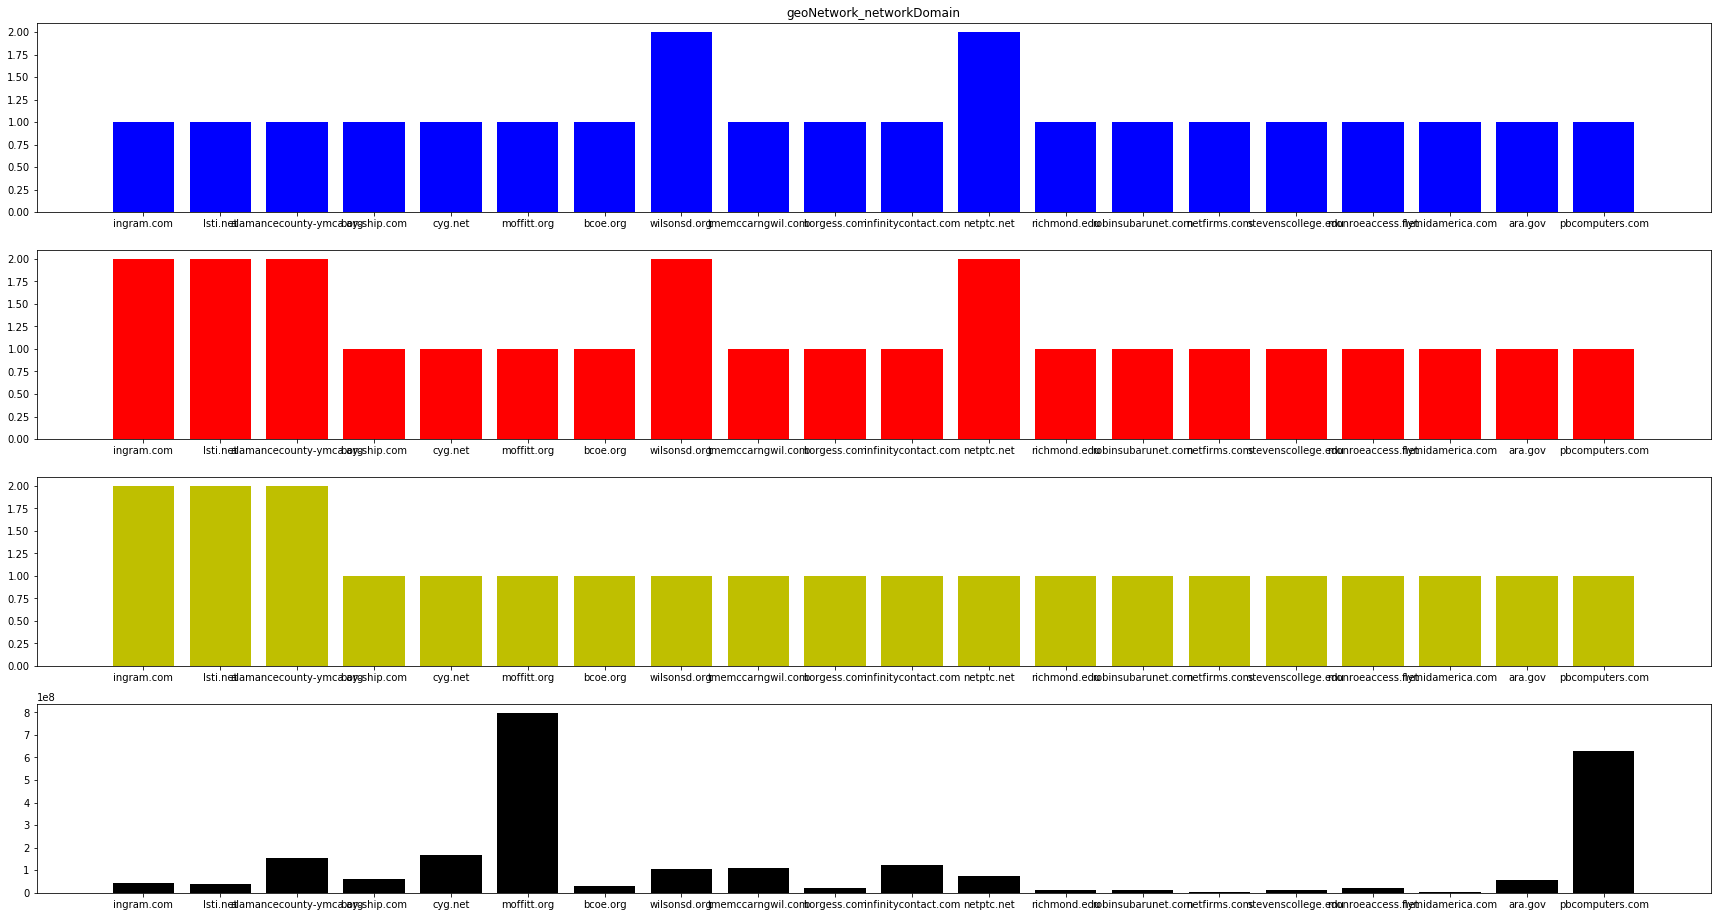

In [3]:
col='geoNetwork_networkDomain'

fig = plt.figure()
no=1
no_of_plot=4
n=20
h=4

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

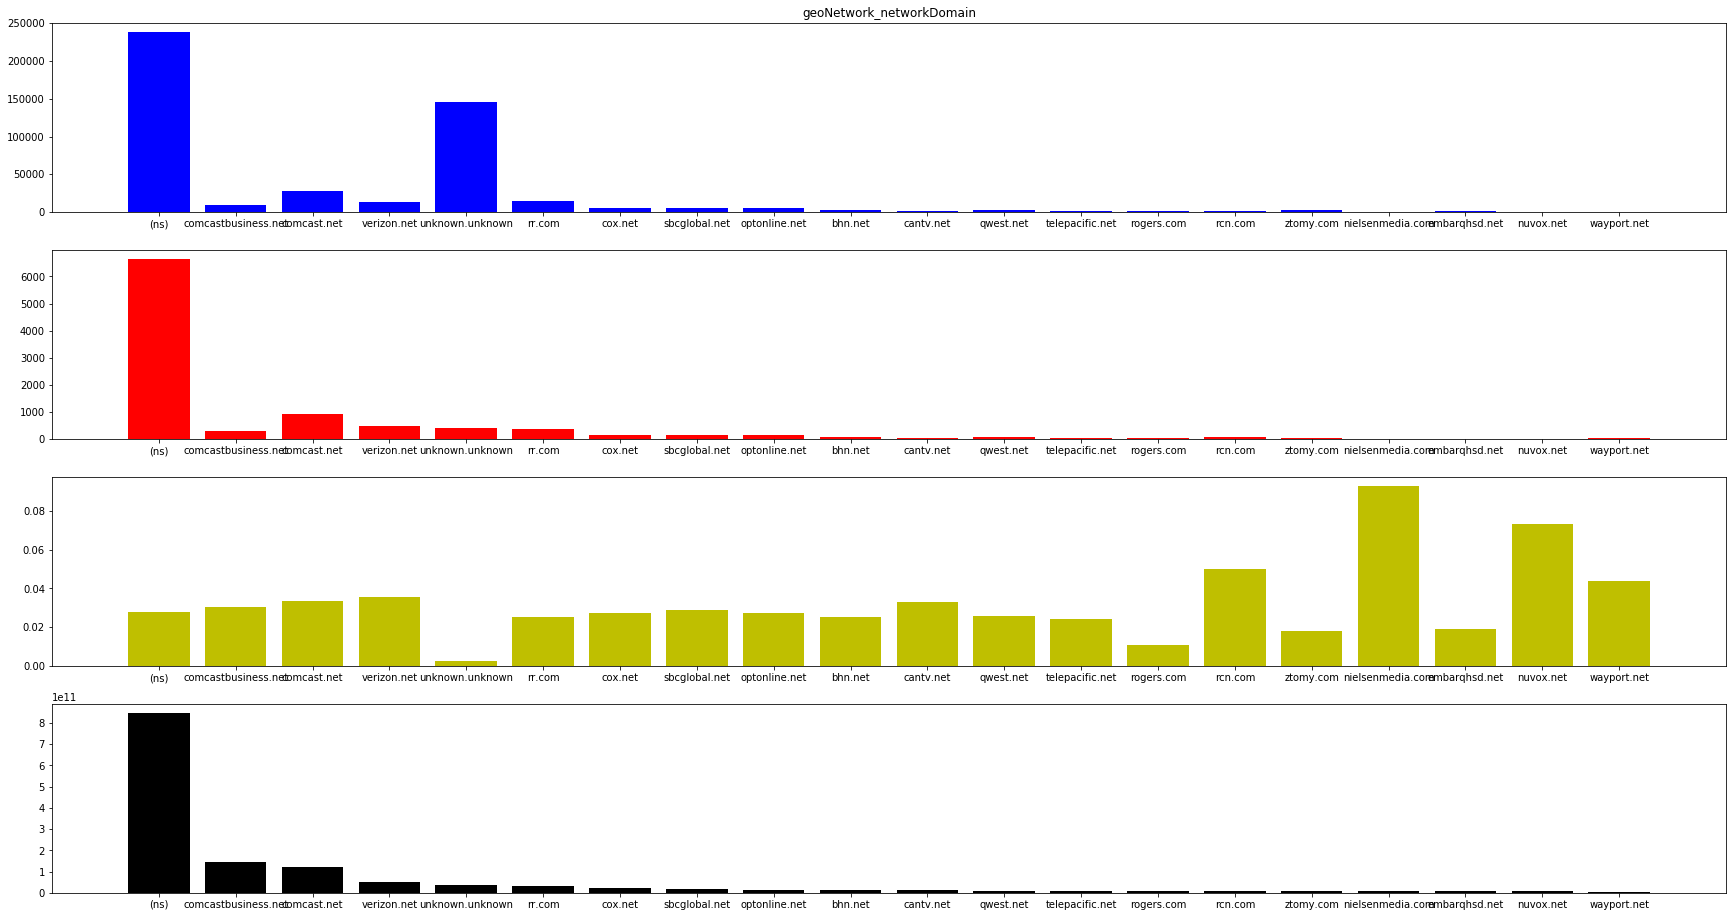

In [4]:
fig = plt.figure()
no=1
no_of_plot=4
n=20
h=4
_x=_x2.sort_values(['total_revenue'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [5]:
data.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device_browser',
       'device_deviceCategory', 'device_isMobile', 'device_operatingSystem',
       'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
       'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region',
       'geoNetwork_subContinent', 'totals_bounces', 'totals_hits',
       'totals_newVisits', 'totals_pageviews', 'trafficSource_adContent',
       'trafficSource_campaign', 'trafficSource_keyword',
       'trafficSource_medium', 'trafficSource_referralPath',
       'trafficSource_source', 'trafficSource_adwordsClickInfo_page',
       'trafficSource_adwordsClickInfo_slot',
       'trafficSource_adwordsClickInfo_gclId',
       'trafficSource_adwordsClickInfo_adNetworkType',
       'totals_bounces_imputed', 'totals_newVisits_imputed',
       'totals_pageviews_imputed', 'totals_transactionRevenue',
       'totals_pageviews_to_5', 'totals

## geoNetwork_region

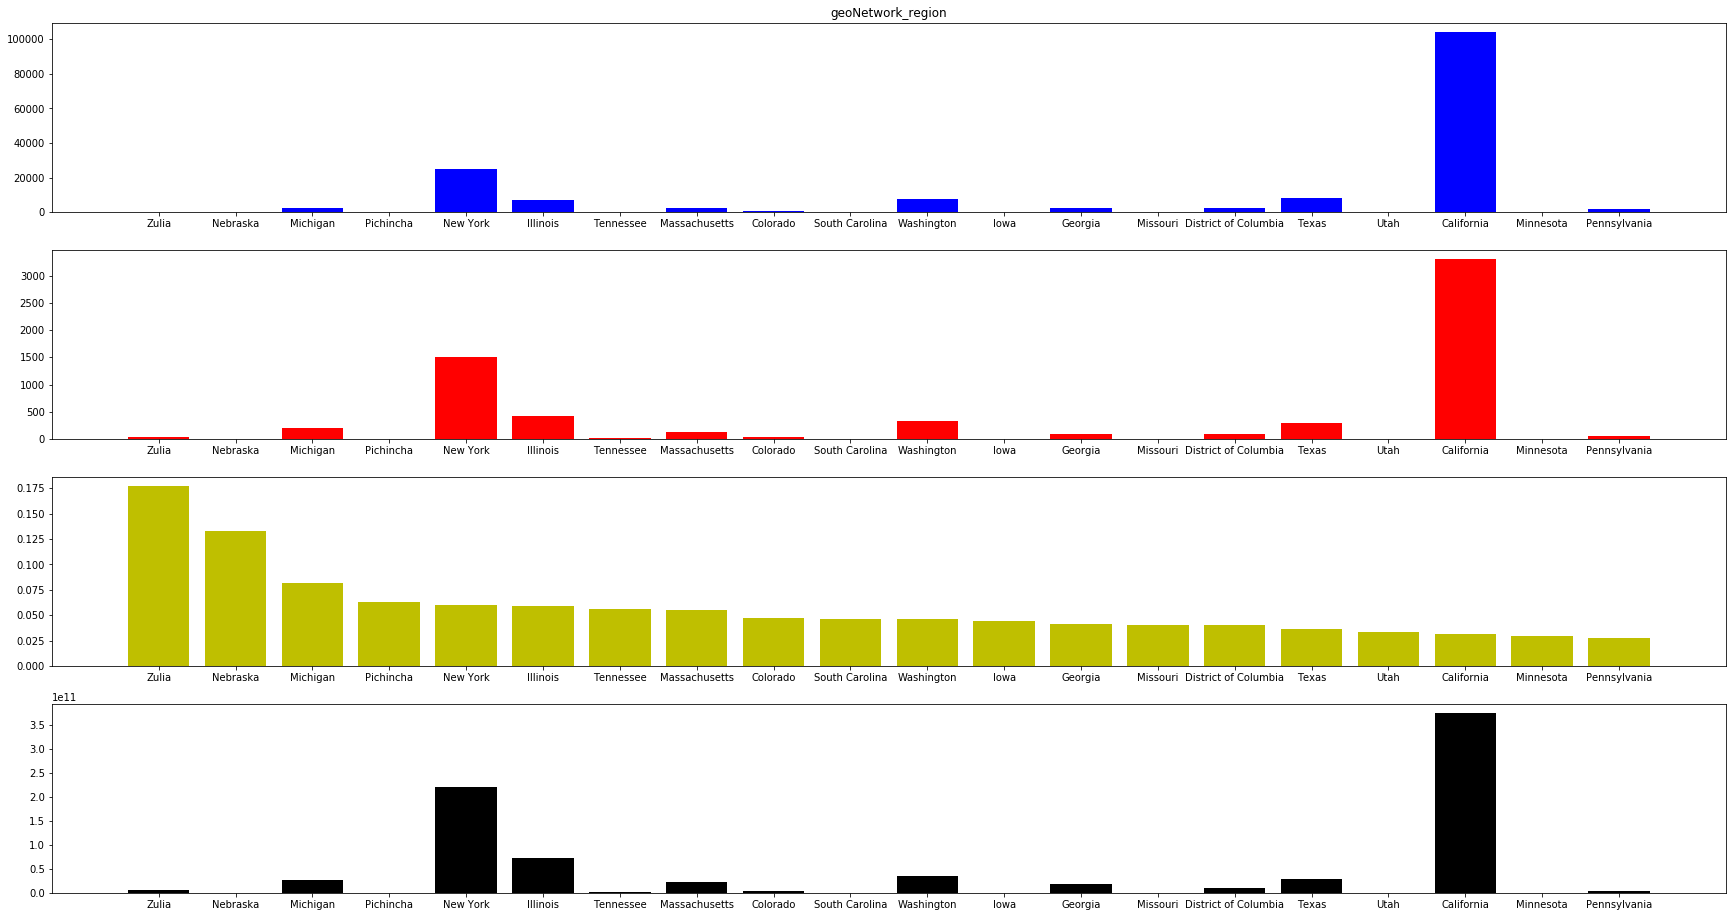

In [6]:
col='geoNetwork_region'

fig = plt.figure()
no=1
no_of_plot=4
n=20
h=4

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

In [7]:
_x['trans_view_ratio_by_revenue']=_x['rev_to_zero_ratio']*_x['total_revenue']
_x=_x.sort_values(['trans_view_ratio_by_revenue'],ascending=False)
_x.head(20)

,geoNetwork_region,total_zero_rev_visit,total_zero_rev,total_transaction,total_revenue,rev_to_zero_ratio,trans_view_ratio_by_revenue
48,New York,24926,0.0,1507,2.201605e+11,0.060459,1.331067e+10
10,California,104190,0.0,3305,3.754982e+11,0.031721,1.191114e+10
78,nad,503650,0.0,4579,6.461611e+11,0.009092,5.874658e+09
26,Illinois,7162,0.0,423,7.291288e+10,0.059062,4.306360e+09
40,Michigan,2384,0.0,194,2.669845e+10,0.081376,2.172609e+09
74,Washington,7306,0.0,336,3.517995e+10,0.045990,1.617912e+09
37,Massachusetts,2503,0.0,137,2.288808e+10,0.054734,1.252763e+09
68,Texas,8446,0.0,303,2.865886e+10,0.035875,1.028136e+09
76,Zulia,203,0.0,36,5.507890e+09,0.177340,9.767687e+08
22,Georgia,2377,0.0,99,1.756982e+10,0.041649,7.317679e+08


## geoNetwork_subContinent

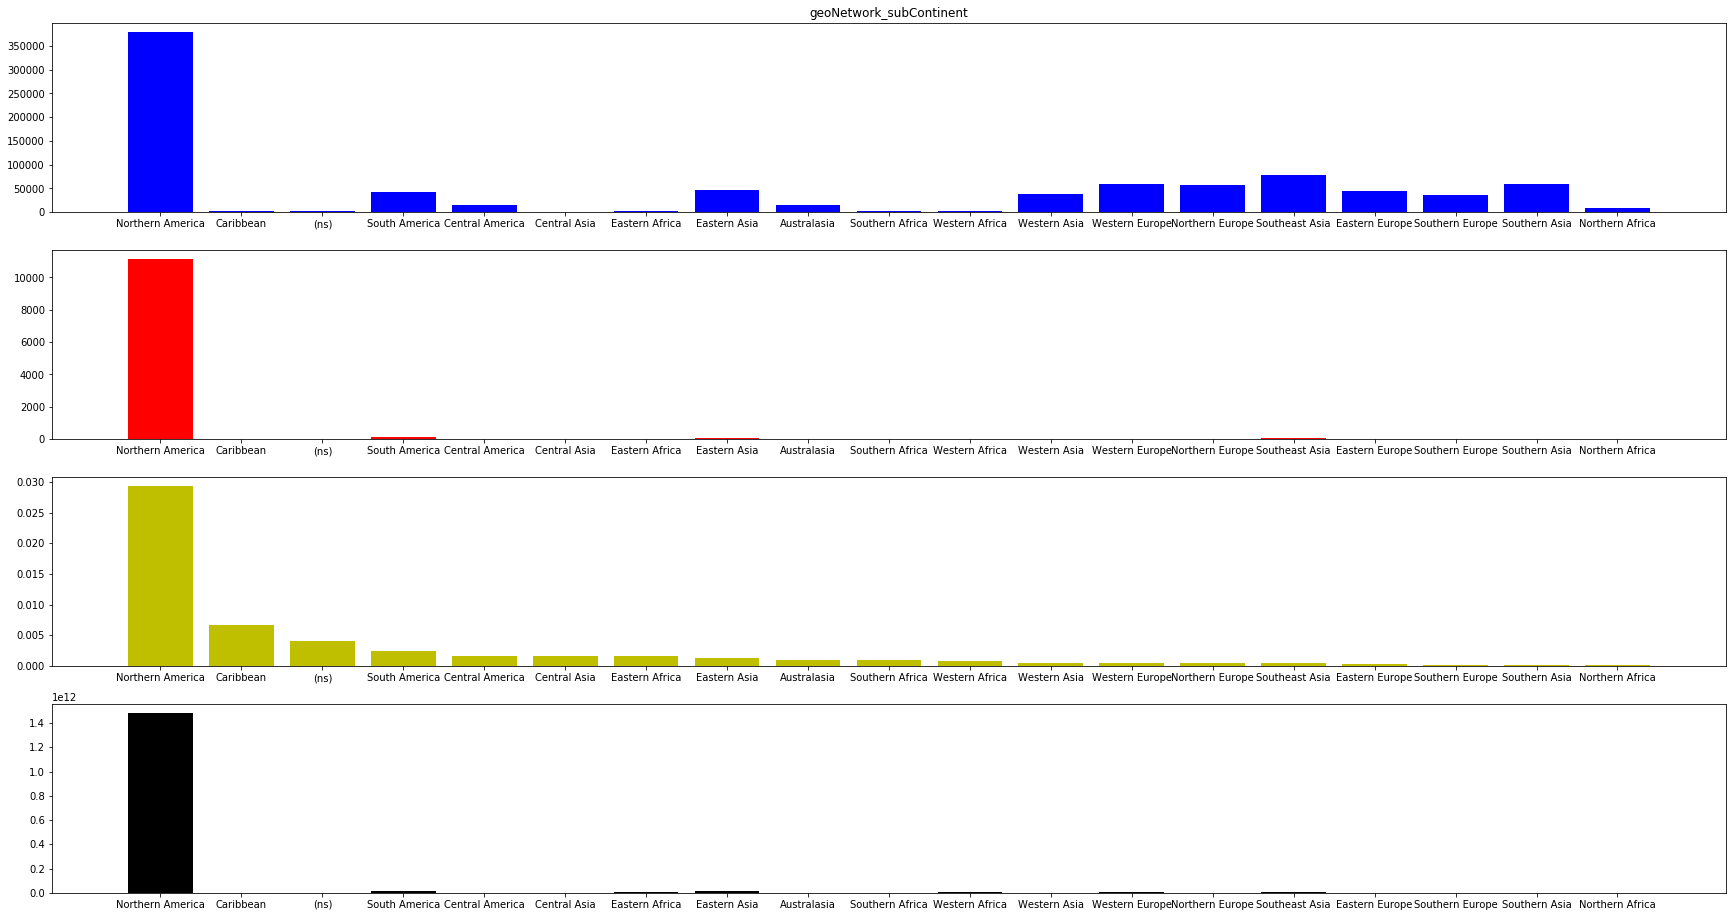

In [8]:
col='geoNetwork_subContinent'

fig = plt.figure()
no=1
no_of_plot=4
n=20
h=4

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2.sort_values(['rev_to_zero_ratio'],ascending=False)
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(_x[col].head(n),_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(_x[col].head(n),_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(_x[col].head(n),_x['total_revenue'].head(n),color='k')
fig.set_figwidth(30)
fig.set_figheight(h*no_of_plot)
plt.show()

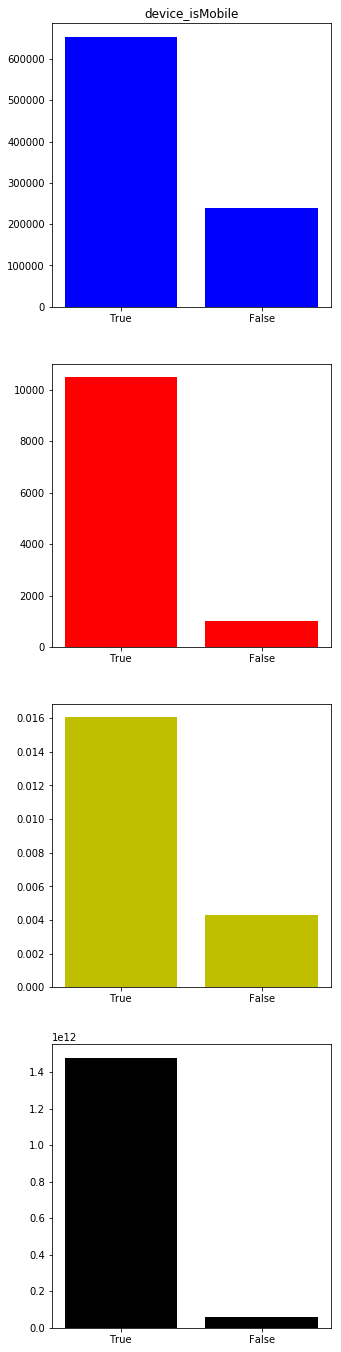

In [43]:
col='device_isMobile'
fig = plt.figure()
no=1
no_of_plot=4
n=100

_x=(data[data['totals_transactionRevenue']==0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_zero_rev_visit','totals_transactionRevenue':'total_zero_rev'})
_x2=(data[data['totals_transactionRevenue']>0.0]).groupby([col]).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x2=_x.merge(_x2,on=col)
#_x=_x2.sort_values(['total_transaction'],ascending=False)
_x2['rev_to_zero_ratio']=_x2['total_transaction']/_x2['total_zero_rev_visit']
_x=_x2
ax = fig.add_subplot(no_of_plot,1,no)
no=no+1
#ax.bar(_x[col].head(n),_x['total_zero_rev_visit'].head(n),color='b')
ax.bar(['True','False'],_x['total_zero_rev_visit'].head(n),color='b')
ax.set_title(col)

ax2=fig.add_subplot(no_of_plot,1,no)
ax2.bar(['True','False'],_x['total_transaction'].head(n),color='r')
no=no+1
#_x=_x2.sort_values(['total_revenue'],ascending=False)
ax3=fig.add_subplot(no_of_plot,1,no)
ax3.bar(['True','False'],_x['rev_to_zero_ratio'].head(n),color='y')
no=no+1

ax4=fig.add_subplot(no_of_plot,1,no)
ax4.bar(['True','False'],_x['total_revenue'].head(n),color='k')
fig.set_figwidth(5)
fig.set_figheight(h*no_of_plot)
plt.show()

In [11]:
data.dtypes.T

channelGrouping                                  object
date                                             object
fullVisitorId                                    object
sessionId                                        object
visitId                                           int64
visitNumber                                       int64
visitStartTime                                    int64
device_browser                                   object
device_deviceCategory                            object
device_isMobile                                    bool
device_operatingSystem                           object
geoNetwork_city                                  object
geoNetwork_continent                             object
geoNetwork_country                               object
geoNetwork_metro                                 object
geoNetwork_networkDomain                         object
geoNetwork_region                                object
geoNetwork_subContinent                         

In [12]:
data['totals_newVisits'].head()

0    1
1    1
2    1
3    1
4    0
Name: totals_newVisits, dtype: int64

In [38]:
data.groupby(['totals_pageviews_imputed'])['totals_transactionRevenue'].sum()

totals_pageviews_imputed
False    1.540071e+12
True     0.000000e+00
Name: totals_transactionRevenue, dtype: float64

In [39]:
data.groupby(['totals_bounces_imputed'])['totals_transactionRevenue'].sum()

totals_bounces_imputed
False    0.000000e+00
True     1.540071e+12
Name: totals_transactionRevenue, dtype: float64

In [28]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['channelGrouping']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x=_x.sort_values(['total_revenue'],ascending=False)
_x.head(100)

,channelGrouping,total_transaction,total_revenue
6,Referral,5311,6.514299e+11
2,Direct,2042,4.348406e+11
4,Organic Search,3438,3.263805e+11
3,Display,142,7.833746e+10
5,Paid Search,468,4.355890e+10
7,Social,104,4.916540e+09
1,Affiliates,9,5.973800e+08
0,(Other),1,9.990000e+06


In [12]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_city']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_city,total_transaction,total_revenue
133,nad,4579,6.461611e+11
76,New York,1506,2.201435e+11
72,Mountain View,1209,1.261037e+11
103,San Francisco,729,1.008740e+11
117,Sunnyvale,455,3.939358e+10


In [14]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_cityId']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_cityId,total_transaction,total_revenue
0,nad,11515,1.540071e+12


In [13]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_city']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_city,total_transaction,total_revenue
648,nad,503650,0.0
366,Mountain View,39675,0.0
1,(ns),34213,0.0
393,New York,24865,0.0
509,San Francisco,19600,0.0


In [15]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_cityId']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_cityId,total_transaction,total_revenue
0,nad,892138,0.0


In [17]:
data=data.drop(['geoNetwork_cityId'],axis=1)

In [19]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_continent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_continent,total_transaction,total_revenue
2,Americas,11283,1.504672e+12
3,Asia,125,1.740184e+10
4,Europe,79,6.747030e+09
5,Oceania,14,1.793230e+09
1,Africa,8,8.687760e+09


In [20]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_continent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_continent,total_transaction,total_revenue
2,Americas,439094,0.0
3,Asia,223573,0.0
4,Europe,198232,0.0
5,Oceania,15040,0.0
1,Africa,14737,0.0


In [21]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_country']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_country,total_transaction,total_revenue
211,United States,353791,0.0
92,India,51130,0.0
210,United Kingdom,37377,0.0
35,Canada,25679,0.0
216,Vietnam,24598,0.0


In [22]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_country']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_country,total_transaction,total_revenue
66,United States,10953,1.452441e+12
7,Canada,190,3.282454e+10
68,Venezuela,63,1.337490e+10
38,Mexico,20,1.592790e+09
60,Taiwan,19,1.920890e+09


In [23]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_country']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_country,total_transaction,total_revenue
66,United States,10953,1.452441e+12
7,Canada,190,3.282454e+10
68,Venezuela,63,1.337490e+10
38,Mexico,20,1.592790e+09
60,Taiwan,19,1.920890e+09


In [24]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_country']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_country,total_transaction,total_revenue
211,United States,353791,0.0
92,India,51130,0.0
210,United Kingdom,37377,0.0
35,Canada,25679,0.0
216,Vietnam,24598,0.0


In [25]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_metro']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_metro,total_transaction,total_revenue
93,nad,503650,0.0
0,(ns),201497,0.0
78,San Francisco-Oakland-San Jose CA,92994,0.0
59,New York NY,25399,0.0
46,London,12560,0.0


In [26]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_metro']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_metro,total_transaction,total_revenue
45,nad,4579,6.461611e+11
41,San Francisco-Oakland-San Jose CA,2919,3.200364e+11
27,New York NY,1518,2.213181e+11
7,Chicago IL,423,7.291288e+10
22,Los Angeles CA,343,5.133227e+10


In [27]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_networkDomain']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_networkDomain,total_transaction,total_revenue
0,(ns),6645,8.482641e+11
140,comcast.net,934,1.231696e+11
675,verizon.net,469,5.291897e+10
660,unknown.unknown,400,3.490154e+10
525,rr.com,364,3.013218e+10


In [28]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_networkDomain']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_networkDomain,total_transaction,total_revenue
0,(ns),238236,0.0
25788,unknown.unknown,145634,0.0
5060,comcast.net,27809,0.0
20587,rr.com,14463,0.0
24880,ttnet.com.tr,13227,0.0


In [29]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_region']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_region,total_transaction,total_revenue
375,nad,503650,0.0
57,California,104190,0.0
0,(ns),27781,0.0
220,New York,24926,0.0
101,England,13187,0.0


In [30]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_region']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_region,total_transaction,total_revenue
78,nad,4579,6.461611e+11
10,California,3305,3.754982e+11
48,New York,1507,2.201605e+11
26,Illinois,423,7.291288e+10
74,Washington,336,3.517995e+10


In [31]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['geoNetwork_subContinent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_subContinent,total_transaction,total_revenue
9,Northern America,11143,1.485265e+12
11,South America,98,1.593731e+10
6,Eastern Asia,59,1.107522e+10
12,Southeast Asia,32,3.755990e+09
18,Western Europe,30,2.842340e+09


In [32]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['geoNetwork_subContinent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,geoNetwork_subContinent,total_transaction,total_revenue
12,Northern America,379514,0.0
16,Southeast Asia,77768,0.0
18,Southern Asia,59310,0.0
22,Western Europe,59084,0.0
13,Northern Europe,58141,0.0


In [33]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_adContent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adContent,total_transaction,total_revenue
1,?,881335,0.0
18,Google Merchandise Collection,5005,0.0
19,Google Online Store,1241,0.0
7,Display Ad created 3/11/14,964,0.0
11,Full auto ad IMAGE ONLY,817,0.0


In [34]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_adContent']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adContent,total_transaction,total_revenue
1,?,11372,1.523863e+12
6,Google Merchandise Collection,117,1.495831e+10
5,Full auto ad IMAGE ONLY,5,2.623800e+08
7,Google Online Store,4,1.634200e+08
3,Display Ad created 3/11/14,3,3.023100e+08


In [35]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_campaign']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_campaign,total_transaction,total_revenue
0,(ns),11050,1.496781e+12
3,AW - Dynamic Search Ads Whole Site,323,2.713255e+10
1,AW - Accessories,130,1.541782e+10
4,Data Share Promo,9,5.973800e+08
2,AW - Apparel,1,7.782000e+07


In [36]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_campaign']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_campaign,total_transaction,total_revenue
0,(ns),854297,0.0
7,Data Share Promo,16394,0.0
3,AW - Dynamic Search Ads Whole Site,13921,0.0
1,AW - Accessories,6940,0.0
9,test-liyuhz,391,0.0


In [37]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_keyword']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_keyword,total_transaction,total_revenue
101,?,495285,0.0
11,(np),362976,0.0
94,6qEhsCssdK0z36ri,11242,0.0
7,(Remarketing/Content targeting),2289,0.0
84,1hZbAqLCbjwfgOH7,2208,0.0


In [38]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_keyword']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_keyword,total_transaction,total_revenue
15,?,7644,1.173338e+12
2,(np),3387,3.222450e+11
14,6qEhsCssdK0z36ri,261,2.298290e+10
26,google merchandise store,59,5.601830e+09
13,1hZbAqLCbjwfgOH7,56,3.840740e+09


In [39]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_medium']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_medium,total_transaction,total_revenue
6,referral,5415,6.563464e+11
5,organic,3438,3.263805e+11
0,(none),2042,4.348406e+11
3,cpc,468,4.355890e+10
4,cpm,142,7.833746e+10


In [40]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_medium']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_medium,total_transaction,total_revenue
5,organic,378123,0.0
6,referral,325540,0.0
0,(none),140984,0.0
3,cpc,24858,0.0
2,affiliate,16394,0.0


In [41]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_referralPath']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_referralPath,total_transaction,total_revenue
1473,?,566612,0.0
1340,/yt/about/,71028,0.0
0,/,70372,0.0
365,/analytics/web/,14620,0.0
1446,/yt/about/tr/,14599,0.0


In [42]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_referralPath']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_referralPath,total_transaction,total_revenue
51,?,6100,8.837248e+11
0,/,5151,6.154737e+11
33,/mail/u/0/,55,2.286131e+10
15,/a/google.com/forum/,35,1.493380e+09
30,/google-merchandise-store,22,2.161830e+09


In [44]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_source']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_source,total_transaction,total_revenue
25,mall.googleplex.com,5103,6.129680e+11
15,google,3879,3.689654e+11
0,(direct),2042,4.348406e+11
9,dfa,123,7.692842e+10
24,mail.google.com,62,2.332791e+10


In [45]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_source']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_source,total_transaction,total_revenue
149,google,396909,0.0
378,youtube.com,212591,0.0
0,(direct),140986,0.0
267,mall.googleplex.com,61313,0.0
54,Partners,16402,0.0


In [46]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_adwordsClickInfo_page']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_page,total_transaction,total_revenue
8,?,871132,0.0
0,1,20908,0.0
2,2,73,0.0
3,3,10,0.0
5,5,7,0.0


In [47]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_adwordsClickInfo_page']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_page,total_transaction,total_revenue
1,?,11061,1.497443e+12
0,1,454,4.262819e+10


In [48]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_adwordsClickInfo_slot']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_slot,total_transaction,total_revenue
0,?,11061,1.497443e+12
2,Top,449,4.219134e+10
1,RHS,5,4.368500e+08


In [49]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_adwordsClickInfo_slot']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_slot,total_transaction,total_revenue
0,?,871132,0.0
2,Top,20507,0.0
1,RHS,499,0.0


In [50]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_adwordsClickInfo_gclId']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_gclId,total_transaction,total_revenue
0,?,871033,0.0
10023,Cj0KEQjwmIrJBRCRmJ_x7KDo-9oBEiQAuUPKMufMpuG3Zd...,70,0.0
8873,Cj0KEQjw1ee_BRD3hK6x993YzeoBEiQA5RH_BEA562M9tv...,41,0.0
829,CJH1vbf94M8CFUElgQodyakHgQ,29,0.0
8366,Cj0KEQiAw_DEBRChnYiQ_562gsEBEiQA4LcssmB_RWgvpP...,27,0.0


In [51]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_adwordsClickInfo_gclId']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_gclId,total_transaction,total_revenue
0,?,11059,1.497225e+12
292,CjwKCAjwuOHHBRBmEiwAlEMW0B4j09Ol1dHOsKhSIJYpaA...,3,1.664870e+09
200,Cj0KEQjw-73GBRCC7KODl9zToJMBEiQAj1Jgf4L-TvGf-1...,3,2.217350e+09
319,CjwKEAiAj7TCBRCp2Z22ue-zrj4SJACG7SBExAsUjtkXuY...,3,2.449600e+08
211,Cj0KEQjw4fy_BRCX7b6rq_WZgI0BEiQAl78ndxq9PGCMhc...,2,3.398000e+07


In [52]:
_x=(data[data['totals_transactionRevenue']>0.0]).groupby(['trafficSource_adwordsClickInfo_adNetworkType']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_adNetworkType,total_transaction,total_revenue
0,?,11061,1.497443e+12
1,Google Search,454,4.262819e+10


In [53]:
_x=(data[data['totals_transactionRevenue']==0.0]).groupby(['trafficSource_adwordsClickInfo_adNetworkType']).agg({'visitId':'count','totals_transactionRevenue':'sum'}).reset_index().rename(columns={'visitId':'total_transaction','totals_transactionRevenue':'total_revenue'})
_x.sort_values(['total_transaction'],ascending=False).head()

,trafficSource_adwordsClickInfo_adNetworkType,total_transaction,total_revenue
0,?,871132,0.0
1,Google Search,20999,0.0
2,Search partners,7,0.0


In [7]:
def categories_encoder_dictionary(x,y,categories_cols):
    inflection=2
    steepness=0.25
    idx=y[y['totals.transactionRevenue']>0].index
    n_rec=y.shape[0]
    n_rec_event=idx.shape[0]
    n_rec_non_event=n_rec-n_rec_event  
    cat_dict=dict()
    zero=1e-6
    for col in categories_cols:
        g1=x.groupby([col])['date'].count()#],columns=['channelGrouping','instances'])
        g2=x.loc[idx].groupby([col])['date'].count()
        g1=pd.DataFrame(g1)
        g1.columns=['instance']
        g2=pd.DataFrame(g2)
        g2.columns=['events']
        g1=g1.join(g2)
        g1['events']=g1.events.fillna(0)
        g1['non_event']=g1['instance']-g1['events']
        g1['prec_non_event']=(g1['non_event']/n_rec_non_event)*100
        g1['prec_event']=(g1['events']/n_rec_event)*100
        g1['WoE']=np.log(((g1['non_event']+zero)/n_rec_non_event)/((g1['events']+zero)/n_rec_event))
        g1['Info_val']=(g1['prec_non_event']-g1['prec_event'])/100*g1['WoE']
        g1['lambda']=1/(1+np.exp(-(g1['events']-inflection)/steepness))
        g1['Target_Mean']=g1['lambda']*g1['events']/g1['instance']+(1-g1['lambda'])*n_rec_event/n_rec
        cat_dict.update({col:g1})
    return cat_dict

In [18]:
cat_dict=categories_encoder_dictionary(x,y,categories)